In [1]:
%load_ext autoreload
%autoreload 2

P-test_121.npy


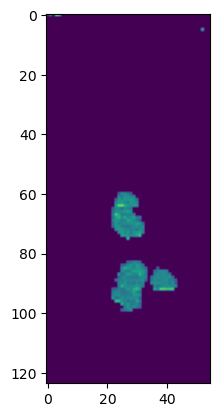

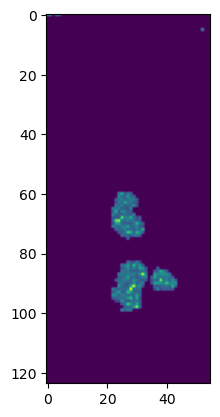

In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np

pcms_path = "/home/data/tinycam/test/probs_plip"
attn_path = "/home/data/tinycam/test/probs_clip"

for file in os.listdir(pcms_path):
    print(file)
    break

plt.figure()
im = np.load(pcms_path + "/" + "P-test_121.npy")
plt.imshow(im)

plt.figure()
im = np.load(attn_path + "/" + "P-test_121.npy")
plt.imshow(im)


In [9]:
from embed_patches import eval_pcms
import utils

gts_path = "/home/data/tinycam/test/gt_masks"
label_dict = utils.deserialize("/home/lofi/lofi/src/outputs/test-cam-cam16-224-background-labeldict.obj")
valid_coords = utils.deserialize("/home/lofi/lofi/src/outputs/test_valid_coords.obj")

for modelstr in ["vit_iid", "clip", "plip"]:
    if modelstr == "vit_iid":
        pcms_path = "/home/data/tinycam/test/probs_vit_iid"
        other_results_vit_pcm = eval_pcms(pcms_path, gts_path, label_dict, valid_coords)
        attn_path = "/home/data/tinycam/test/attn_vit_iid"
        other_results_vit_sam = eval_pcms(attn_path, gts_path, label_dict, valid_coords, mode="attn")
    elif modelstr == "clip":
        pcms_path = "/home/data/tinycam/test/probs_clip"
        other_results_clip_pcm = eval_pcms(pcms_path, gts_path, label_dict, valid_coords)
    elif modelstr == "plip":
        pcms_path = "/home/data/tinycam/test/probs_plip"
        other_results_plip_pcm = eval_pcms(pcms_path, gts_path, label_dict, valid_coords)

other_results = {"vit_iid_pcm": other_results_vit_pcm,
                 "vit_iid_sam": other_results_vit_sam,
                 "clip_pcm": other_results_clip_pcm,
                 "plip_pcm": other_results_plip_pcm}


In [10]:
from embed_patches import display_adaptive_continuous_structure_eval_pcm
display_adaptive_continuous_structure_eval_pcm(other_results)


vit_iid_pcm
-----------
CONTINUOUS THRESHOLDING:
auroc, auprc, ap: 0.3955102951162122 0.18502768671096934 0.19502979280615454
ADAPTIVE THRESHOLDING:
mcc f/b: 0.0 0.0
prec f/b: 0.0 0.17073646960859265
ba f/b: 0.5 0.5
STRUCTURE:
mod f/b: 0.0 5092.479166666667

vit_iid_sam
-----------
CONTINUOUS THRESHOLDING:
auroc, auprc, ap: [0.34752835 0.34752835 0.34752835] [0.15188185 0.15188185 0.15188185] [0.16074171 0.16074171 0.16074171]
ADAPTIVE THRESHOLDING:
mcc f/b: 0.0 0.0
prec f/b: 0.0 0.17073646960859265
ba f/b: 0.5 0.5
STRUCTURE:
mod f/b: 0.0 5092.479166666667

clip_pcm
-----------
CONTINUOUS THRESHOLDING:
auroc, auprc, ap: 0.2963014427530162 0.14625587919080418 0.15649493006613024
ADAPTIVE THRESHOLDING:
mcc f/b: 0.0 0.0
prec f/b: 0.0 0.17073646960859265
ba f/b: 0.5 0.5
STRUCTURE:
mod f/b: 0.0 5092.479166666667

plip_pcm
-----------
CONTINUOUS THRESHOLDING:
auroc, auprc, ap: 0.2930968908443256 0.14873235458448383 0.15793808356657255
ADAPTIVE THRESHOLDING:
mcc f/b: 0.0 0.0
prec f/b: 0.0 0.

(tp, tn, fp, fn)

In [11]:
from embed_patches import get_max_performances

results_tile2vec = "/home/lofi/lofi/src/outputs_tile2vec/tile2vec_all_results_lofi.obj"
results_vit = "/home/lofi/lofi/src/outputs_vit_iid/vit_iid_all_results_lofi.obj"
results_clip = "/home/lofi/lofi/src/outputs_clip/clip_all_results_lofi.obj"
results_plip = "/home/lofi/lofi/src/outputs_plip/plip_all_results_lofi.obj"

elastic_tile2vec = "/home/lofi/lofi/src/outputs_tile2vec/tile2vec_elastic_dict.obj"
elastic_vit = "/home/lofi/lofi/src/outputs_vit_iid/vit_iid_elastic_dict.obj"
elastic_clip = "/home/lofi/lofi/src/outputs_clip/clip_elastic_dict.obj"
elastic_plip = "/home/lofi/lofi/src/outputs_plip/plip_elastic_dict.obj"

tfidfs_tile2vec = "/home/lofi/lofi/src/outputs_tile2vec/tile2vec_tfidfs_dict.obj"
tfidfs_vit = "/home/lofi/lofi/src/outputs_vit_iid/vit_iid_tfidfs_dict.obj"
tfidfs_clip = "/home/lofi/lofi/src/outputs_clip/clip_tfidfs_dict.obj"
tfidfs_plip = "/home/lofi/lofi/src/outputs_plip/plip_tfidfs_dict.obj"

kmeans_tile2vec = "/home/lofi/lofi/src/outputs_tile2vec/tile2vec_kmeans_models_dict.obj"
kmeans_vit = "/home/lofi/lofi/src/outputs_vit_iid/vit_iid_kmeans_models_dict.obj"
kmeans_clip = "/home/lofi/lofi/src/outputs_clip/clip_kmeans_models_dict.obj"
kmeans_plip = "/home/lofi/lofi/src/outputs_plip/plip_kmeans_models_dict.obj"

crops_tile2vec = "/home/lofi/lofi/src/outputs_tile2vec/test_crop_coords.obj"
crops_vit_iid = "/home/lofi/lofi/src/outputs_vit_iid/test_vit_iid_crop_coords.obj"
crops_clip = "/home/lofi/lofi/src/outputs_clip/test_clip_crop_coords.obj"
crops_plip = "/home/lofi/lofi/src/outputs_plip/test_plip_crop_coords.obj"

Zs_tile2vec = "/home/data/tinycam/test/clean_Zs"
Zs_vit_iid = "/home/data/tinycam/test/clean_Zs_vit"
Zs_clip = "/home/data/tinycam/test/clean_Zs_clip"
Zs_plip = "/home/data/tinycam/test/clean_Zs_plip"

results_list = [results_tile2vec, results_vit, results_clip, results_plip]
elastic_list = [elastic_tile2vec, elastic_vit, elastic_clip, elastic_plip]
tfidfs_list = [tfidfs_tile2vec, tfidfs_vit, tfidfs_clip, tfidfs_plip]
kmeans_list = [kmeans_tile2vec, kmeans_vit, kmeans_clip, kmeans_plip]
crops_list = [crops_tile2vec, crops_vit_iid, crops_clip, crops_plip]
Zs_list = [Zs_tile2vec, Zs_vit_iid, Zs_clip, Zs_plip] 

encoder_list = ["tile2vec", "vit_iid", "clip", "plip"]

In [7]:
# from embed_patches import get_valid_coordinates
# valid_coords_tile2vec = get_valid_coordinates(Zs_tile2vec, gts_path, crops_tile2vec)
# valid_coords_vit_iid = get_valid_coordinates(Zs_vit_iid, gts_path, crops_vit_iid)
# valid_coords_clip = get_valid_coordinates(Zs_clip, gts_path, crops_clip)
# valid_coords_plip = get_valid_coordinates(Zs_plip, gts_path, crops_plip)

In [8]:
# print(np.max(valid_coords_plip["test_114"][0]))
# print(np.max(valid_coords_plip["test_114"][1]))
# print(np.max(valids["test_047"][0]))
# print(np.max(valids["test_047"][1]))

In [9]:
# valids.keys()

In [10]:
# valids = {}
# for k in valid_coords_tile2vec.keys():
#     xs = list(valid_coords_tile2vec[k][0]) + list(valid_coords_vit_iid[k][0]) + list(valid_coords_clip[k][0]) + list(valid_coords_plip[k][0])
#     ys = list(valid_coords_tile2vec[k][1]) + list(valid_coords_vit_iid[k][1]) + list(valid_coords_clip[k][1]) + list(valid_coords_plip[k][1])
    
#     unique = set()
#     for idx in range(len(xs)):
#         i,j = xs[idx], ys[idx]
#         if (i,j) not in unique:
#             unique.add((i,j))
#         idxs_i = np.array([el[0] for el in unique])
#         idxs_j = np.array([el[1] for el in unique])
#     valids[k] = (idxs_i, idxs_j)


In [11]:
# from utils import serialize 
# serialize(valids, "/home/lofi/lofi/src/outputs/test_valid_coords.obj")

In [12]:
# for k in valids.keys():
#     print(set(valids[k][0]) == set(valid_coords_clip[k][0]))

# Using the gridsearch to pick top `K2` configs for other other analyses
Also: Perform stability analyses per metric

In [12]:
top_configs = []

TOP CONFIG: K10-r8-DEtok-a0.01-t1

MULTI-THREHOLDING:
tile2vec = 0.8395969615349118 (k2)

k2 min delta: 0.0
k2 mean delta: 0.1845784633512474
k2 median delta: 0.21334296096616157
k2 max delta: 0.44453728493866385

pcm delta: None
sam delta: None

ADAPTIVE THRESHOLDING


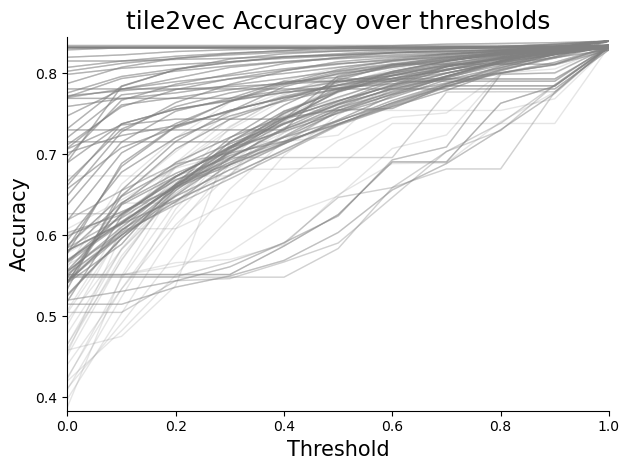

TOP CONFIG: K10-r8-elastic

MULTI-THREHOLDING:
vit_iid = 0.8395969615349118 (k2)
vit_iid = 0.8292635303914074 (pcm)
vit_iid = 0.8292635303914073 (attn)

k2 min delta: 0.0
k2 mean delta: 0.19494288771330937
k2 median delta: 0.23076398752163352
k2 max delta: 0.5481410977468542

pcm delta: 0.7037792661187771
sam delta: 0.7026862449666524

ADAPTIVE THRESHOLDING
vit_iid = 0.8292635303914073 (pcm-thresh forward)
vit_iid = 0.17073646960859265 (pcm-thresh backward)
vit_iid = 0.8292635303914073 (attn-thresh forward)
vit_iid = 0.17073646960859265 (attn-thresh backward)


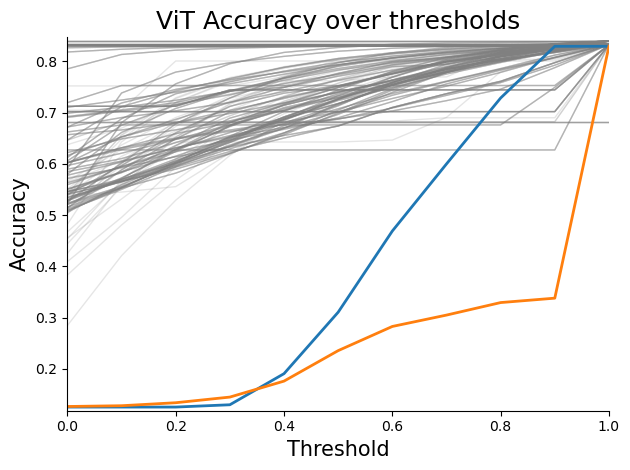

TOP CONFIG: K30-r4-DEtok-a0.01-t2

MULTI-THREHOLDING:
clip = 0.8634118146750618 (k2)
clip = 0.8292635303914074 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.09260878644385684
k2 median delta: 0.031130308598826928
k2 max delta: 0.3609369371065357

pcm delta: 0.6994457072604613
sam delta: None

ADAPTIVE THRESHOLDING
clip = 0.8292635303914073 (pcm-thresh forward)
clip = 0.17073646960859265 (pcm-thresh backward)


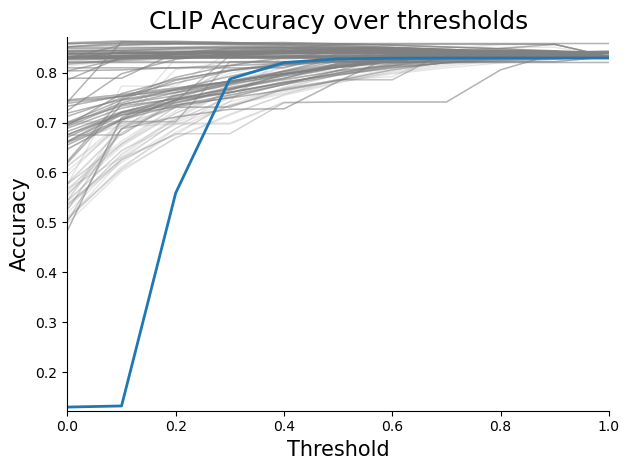

TOP CONFIG: K30-r1-DEtok-a0.01-t2

MULTI-THREHOLDING:
plip = 0.8786171996024655 (k2)
plip = 0.8292635303914074 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.09692519616683538
k2 median delta: 0.07973411360088822
k2 max delta: 0.40009640652048667

pcm delta: 0.6994457072604613
sam delta: None

ADAPTIVE THRESHOLDING
plip = 0.8292635303914073 (pcm-thresh forward)
plip = 0.17073646960859265 (pcm-thresh backward)


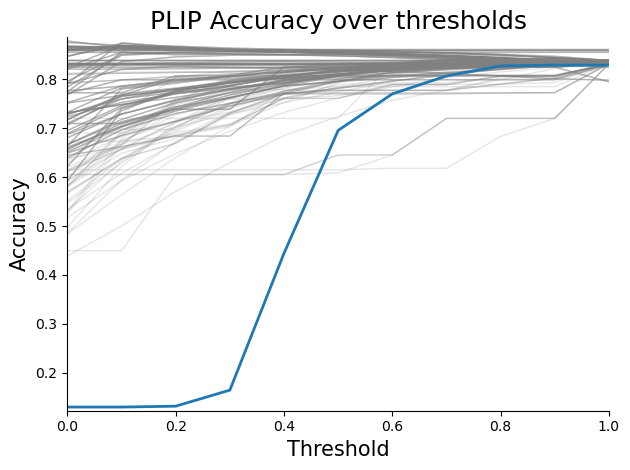

In [13]:
bars, tcs = get_max_performances(results_list, elastic_list, encoder_list, other_results=other_results, stat="accuracy", type="thresh_max")
top_configs.append(tcs)

TOP CONFIG: K10-r4-elastic

MULTI-THREHOLDING:
tile2vec = 0.013575364481639844 (k2)

k2 min delta: 0.0
k2 mean delta: 0.05790534668762311
k2 median delta: 0.05495759750317108
k2 max delta: 0.12472665953867164

pcm delta: None
sam delta: None

ADAPTIVE THRESHOLDING


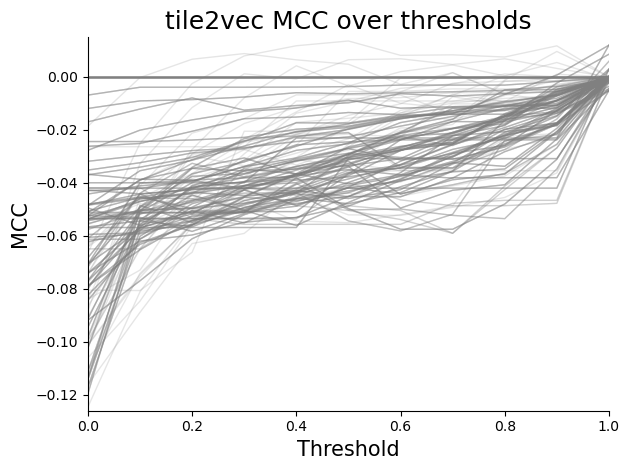

TOP CONFIG: K10-r4-elastic

MULTI-THREHOLDING:
vit_iid = 0.027954711847636333 (k2)
vit_iid = 0.0 (pcm)
vit_iid = 0.0 (attn)

k2 min delta: 0.0
k2 mean delta: 0.07026878232615906
k2 median delta: 0.07151873912718706
k2 max delta: 0.1556224082343247

pcm delta: 0.4078219717894939
sam delta: 0.4125331505609701

ADAPTIVE THRESHOLDING
vit_iid = 0.0 (pcm-thresh forward)
vit_iid = 0.0 (pcm-thresh backward)
vit_iid = 0.0 (attn-thresh forward)
vit_iid = 0.0 (attn-thresh backward)


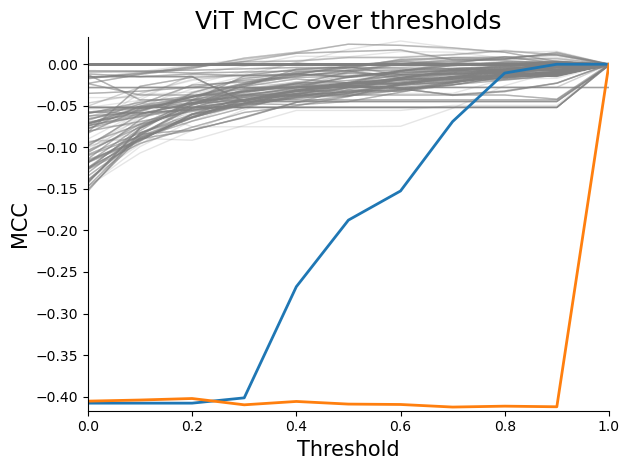

TOP CONFIG: K15-r1-DEtok-a0.01-t1

MULTI-THREHOLDING:
clip = 0.11526642592658691 (k2)
clip = 0.0 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.06209518082497189
k2 median delta: 0.0719275937542309
k2 max delta: 0.17347877724351668

pcm delta: 0.3432020586605255
sam delta: None

ADAPTIVE THRESHOLDING
clip = 0.0 (pcm-thresh forward)
clip = 0.0 (pcm-thresh backward)


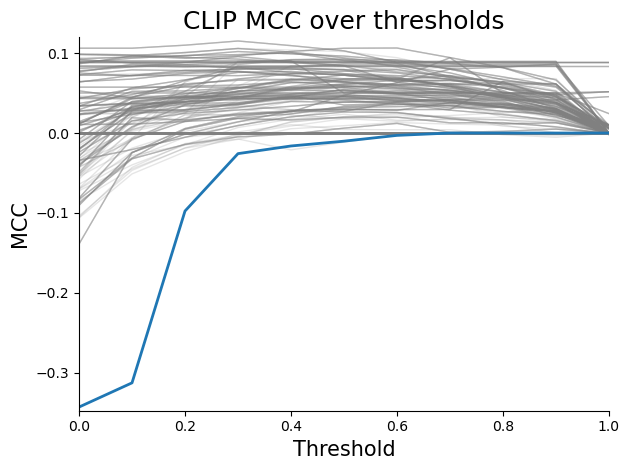

TOP CONFIG: K30-r1-DEtok-a0.01-t2

MULTI-THREHOLDING:
plip = 0.13440177378575352 (k2)
plip = 0.0 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.07266402946356629
k2 median delta: 0.08265940292309432
k2 max delta: 0.15131157558800962

pcm delta: 0.3432020586605255
sam delta: None

ADAPTIVE THRESHOLDING
plip = 0.0 (pcm-thresh forward)
plip = 0.0 (pcm-thresh backward)


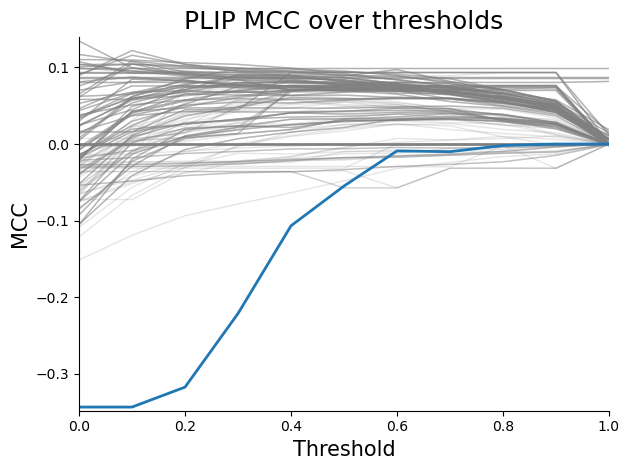

In [14]:
bars, tcs = get_max_performances(results_list, elastic_list, encoder_list, other_results=other_results, stat="phi", type="thresh_max")
top_configs.append(tcs)

TOP CONFIG: K10-r4-elastic

MULTI-THREHOLDING:
tile2vec = 0.22594752186588923 (k2)

k2 min delta: 0.0
k2 mean delta: 0.10194492841934308
k2 median delta: 0.12693117032045212
k2 max delta: 0.22594752186588923

pcm delta: None
sam delta: None

ADAPTIVE THRESHOLDING


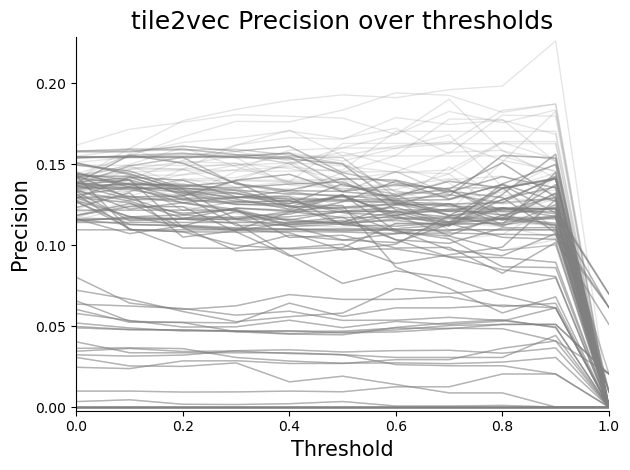

TOP CONFIG: K10-r4-elastic

MULTI-THREHOLDING:
vit_iid = 0.212576211164251 (k2)
vit_iid = 0.16141363270803946 (pcm)
vit_iid = 0.14395450265376894 (attn)

k2 min delta: 0.0
k2 mean delta: 0.08219869953953157
k2 median delta: 0.09287187125239925
k2 max delta: 0.212576211164251

pcm delta: 0.16141363270803946
sam delta: 0.14395450265376894

ADAPTIVE THRESHOLDING
vit_iid = 0.0 (pcm-thresh forward)
vit_iid = 0.17073646960859265 (pcm-thresh backward)
vit_iid = 0.0 (attn-thresh forward)
vit_iid = 0.17073646960859265 (attn-thresh backward)


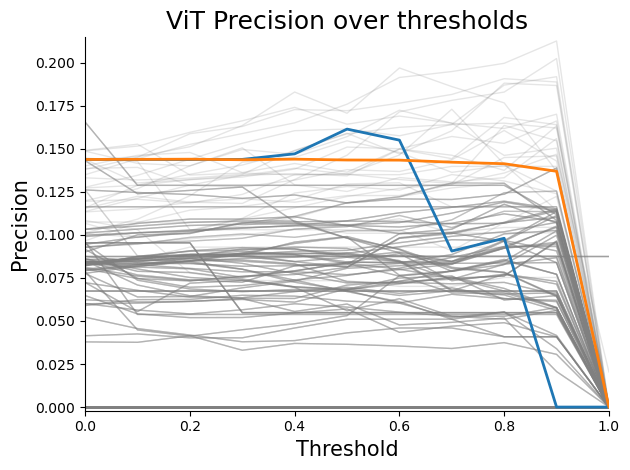

TOP CONFIG: K15-r1-DEtok-a0.01-t0

MULTI-THREHOLDING:
clip = 0.43148688046647227 (k2)
clip = 0.14418746304232197 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.21669002546290103
k2 median delta: 0.2552154195011338
k2 max delta: 0.4110787172011661

pcm delta: 0.14418746304232197
sam delta: None

ADAPTIVE THRESHOLDING
clip = 0.0 (pcm-thresh forward)
clip = 0.17073646960859265 (pcm-thresh backward)


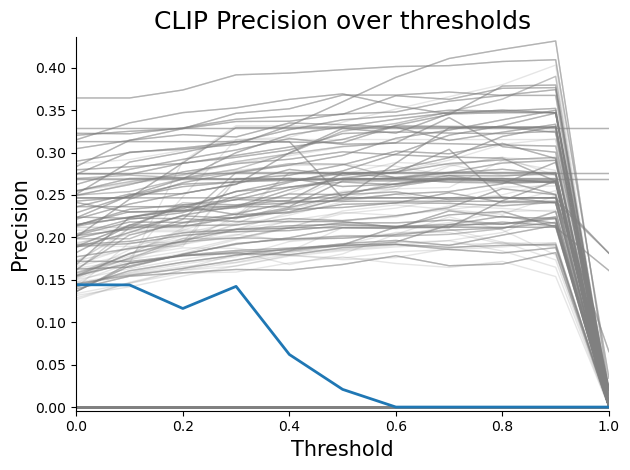

TOP CONFIG: K15-r2-DEtok-a0.01-t1

MULTI-THREHOLDING:
plip = 0.40841836734693876 (k2)
plip = 0.15247375662695759 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.25646783212939606
k2 median delta: 0.326530612244898
k2 max delta: 0.40816326530612246

pcm delta: 0.15247375662695759
sam delta: None

ADAPTIVE THRESHOLDING
plip = 0.0 (pcm-thresh forward)
plip = 0.17073646960859265 (pcm-thresh backward)


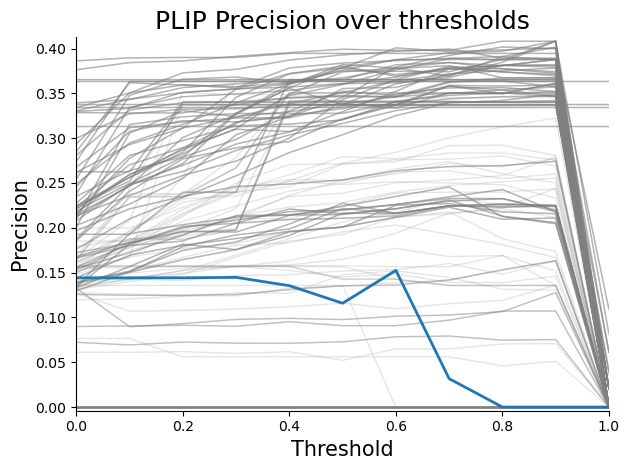

In [15]:
bars, tcs = get_max_performances(results_list, elastic_list, encoder_list, other_results=other_results, stat="precision", type="thresh_max")
top_configs.append(tcs)

TOP CONFIG: K25-r1-elastic

MULTI-THREHOLDING:
tile2vec = 0.5036320535580048 (k2)

k2 min delta: 0.0
k2 mean delta: 0.04838113367363809
k2 median delta: 0.05053987911862101
k2 max delta: 0.12803656809958502

pcm delta: None
sam delta: None

ADAPTIVE THRESHOLDING


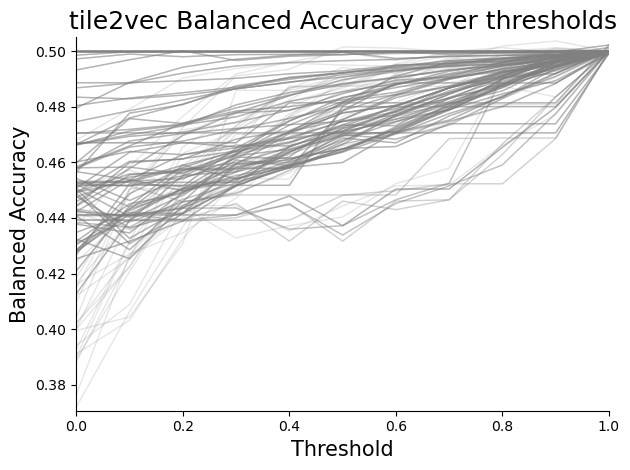

TOP CONFIG: K10-r4-DEtok-a0.01-t0

MULTI-THREHOLDING:
vit_iid = 0.5095451956245015 (k2)
vit_iid = 0.5 (pcm)
vit_iid = 0.5 (attn)

k2 min delta: 0.0
k2 mean delta: 0.05174157623022742
k2 median delta: 0.06241791668091429
k2 max delta: 0.139150271342379

pcm delta: 0.15442744353347765
sam delta: 0.1618042811521057

ADAPTIVE THRESHOLDING
vit_iid = 0.5 (pcm-thresh forward)
vit_iid = 0.5 (pcm-thresh backward)
vit_iid = 0.5 (attn-thresh forward)
vit_iid = 0.5 (attn-thresh backward)


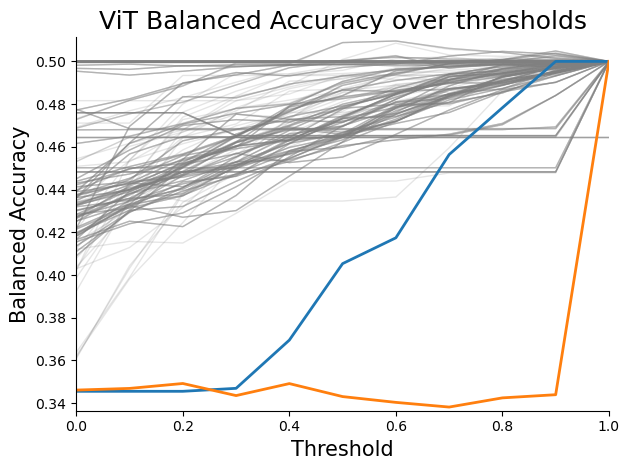

TOP CONFIG: K10-r1-DEtok-a0.01-t0

MULTI-THREHOLDING:
clip = 0.5425223305223433 (k2)
clip = 0.5 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.0333665319633479
k2 median delta: 0.03189016252748034
k2 max delta: 0.12908052399598807

pcm delta: 0.1518946990591578
sam delta: None

ADAPTIVE THRESHOLDING
clip = 0.5 (pcm-thresh forward)
clip = 0.5 (pcm-thresh backward)


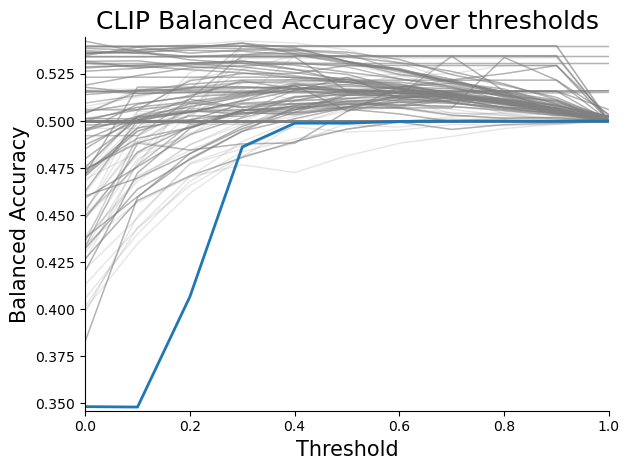

TOP CONFIG: K30-r1-DEtok-a0.01-t2

MULTI-THREHOLDING:
plip = 0.5587110820743146 (k2)
plip = 0.5 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.036242260487629595
k2 median delta: 0.03508255517858361
k2 max delta: 0.13053798653539722

pcm delta: 0.15166455887784364
sam delta: None

ADAPTIVE THRESHOLDING
plip = 0.5 (pcm-thresh forward)
plip = 0.5 (pcm-thresh backward)


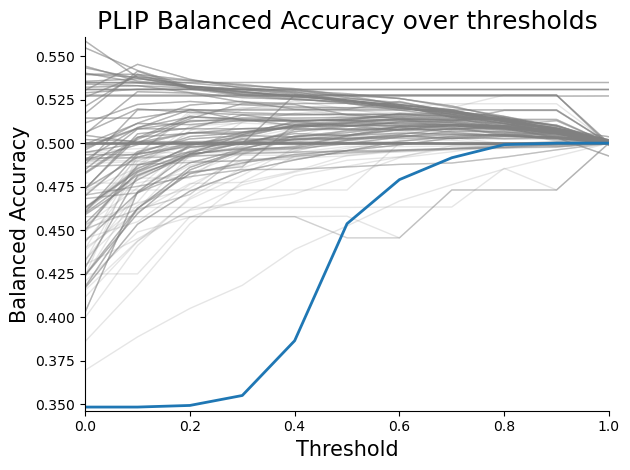

In [16]:
bars, tcs = get_max_performances(results_list, elastic_list, encoder_list, other_results=other_results, stat="balanced_accuracy", type="thresh_max")
top_configs.append(tcs)

TOP CONFIG: K20-r0-DEtok-a0.05-t0

MULTI-THREHOLDING:
tile2vec = 0.1669302884823981 (k2)

k2 min delta: 0.0
k2 mean delta: 0.07797382254663528
k2 median delta: 0.09970959358527988
k2 max delta: 0.1669302884823981

pcm delta: None
sam delta: None

ADAPTIVE THRESHOLDING


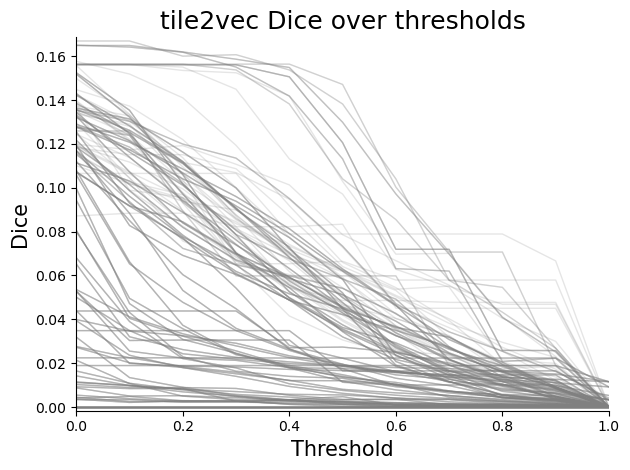

TOP CONFIG: K25-r1-elastic

MULTI-THREHOLDING:
vit_iid = 0.16088201778942193 (k2)
vit_iid = 0.19127601995316457 (pcm)
vit_iid = 0.17889059775521932 (attn)

k2 min delta: 0.0
k2 mean delta: 0.06938997327073908
k2 median delta: 0.09120073779305891
k2 max delta: 0.16088201778942193

pcm delta: 0.19127601995316457
sam delta: 0.17889059775521932

ADAPTIVE THRESHOLDING
vit_iid = 0.0 (pcm-thresh forward)
vit_iid = 0.2290904082978695 (pcm-thresh backward)
vit_iid = 0.0 (attn-thresh forward)
vit_iid = 0.2290904082978695 (attn-thresh backward)


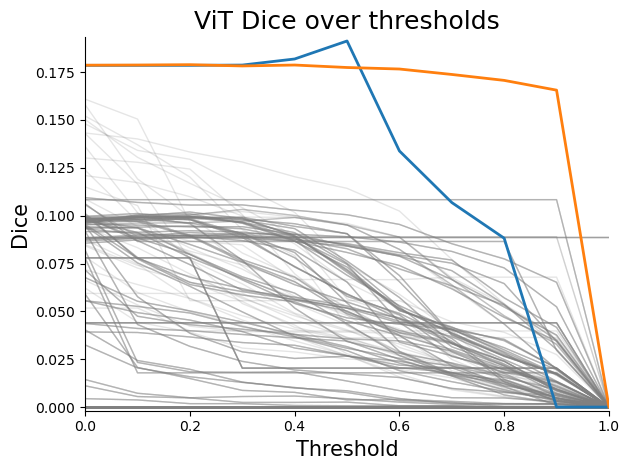

TOP CONFIG: K30-r2-DEtok-a0.01-t1

MULTI-THREHOLDING:
clip = 0.19626099002640648 (k2)
clip = 0.17881703589472364 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.11158025482398731
k2 median delta: 0.13515004745123904
k2 max delta: 0.19626099002640648

pcm delta: 0.17881703589472364
sam delta: None

ADAPTIVE THRESHOLDING
clip = 0.0 (pcm-thresh forward)
clip = 0.2290904082978695 (pcm-thresh backward)


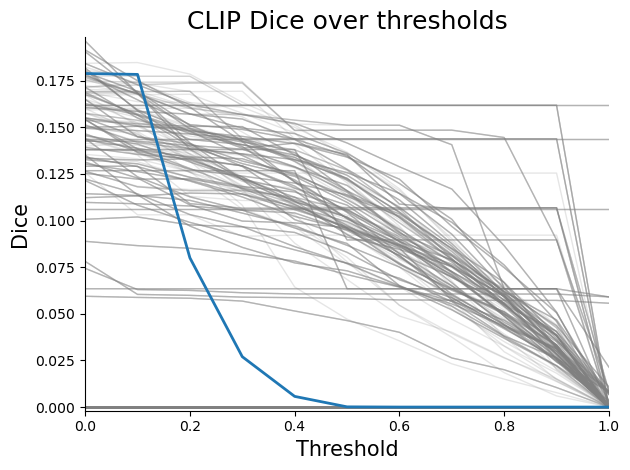

TOP CONFIG: K30-r2-DEtok-a0.01-t1

MULTI-THREHOLDING:
plip = 0.19645855844073462 (k2)
plip = 0.17881703589472364 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.1217627041012338
k2 median delta: 0.1442378018970137
k2 max delta: 0.19645855844073462

pcm delta: 0.17881703589472364
sam delta: None

ADAPTIVE THRESHOLDING
plip = 0.0 (pcm-thresh forward)
plip = 0.2290904082978695 (pcm-thresh backward)


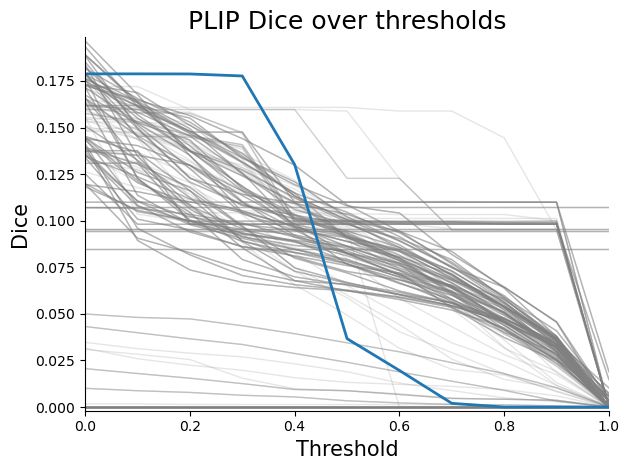

In [17]:
bars, tcs = get_max_performances(results_list, elastic_list, encoder_list, other_results=other_results, stat="dice", type="thresh_max")
top_configs.append(tcs)

TOP CONFIG: K30-r2-elastic

MULTI-THREHOLDING:
tile2vec = 0.4482617893131684 (k2)

k2 min delta: 0.0
k2 mean delta: 0.18667700811509189
k2 median delta: 0.2213466835317419
k2 max delta: 0.4482617893131684

pcm delta: None
sam delta: None

ADAPTIVE THRESHOLDING


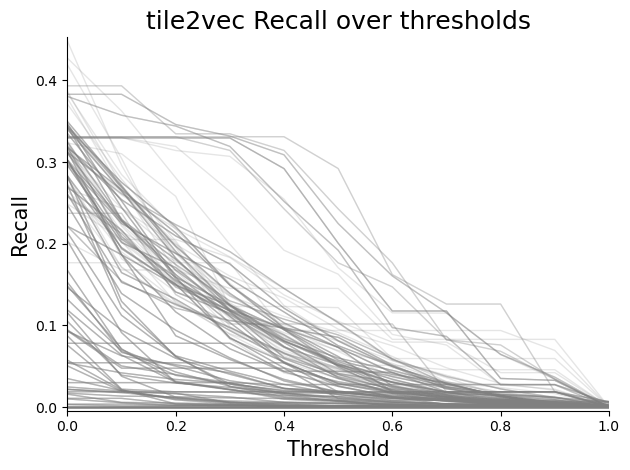

TOP CONFIG: K10-r2-elastic

MULTI-THREHOLDING:
vit_iid = 0.449801404091911 (k2)
vit_iid = 0.6909193376044862 (pcm)
vit_iid = 0.6909193376044861 (attn)

k2 min delta: 0.0
k2 mean delta: 0.18780232139062575
k2 median delta: 0.22310328409168223
k2 max delta: 0.449801404091911

pcm delta: 0.6909193376044862
sam delta: 0.6909193376044861

ADAPTIVE THRESHOLDING
vit_iid = 0.0 (pcm-thresh forward)
vit_iid = 1.0 (pcm-thresh backward)
vit_iid = 0.0 (attn-thresh forward)
vit_iid = 1.0 (attn-thresh backward)


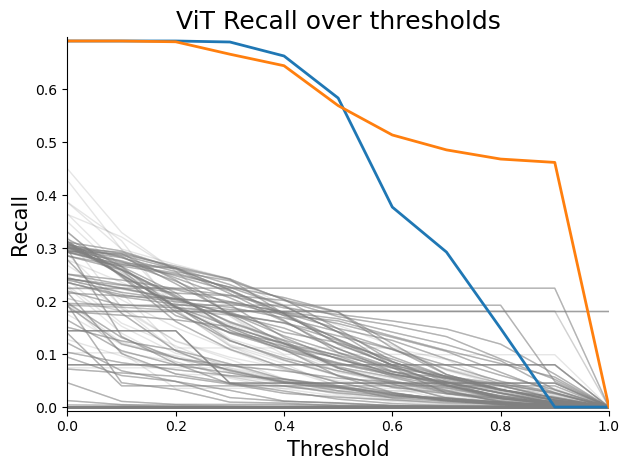

TOP CONFIG: K10-r1-elastic

MULTI-THREHOLDING:
clip = 0.4099538870237805 (k2)
clip = 0.690371956276758 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.15672294329773884
k2 median delta: 0.15012050677343078
k2 max delta: 0.4099538870237805

pcm delta: 0.690371956276758
sam delta: None

ADAPTIVE THRESHOLDING
clip = 0.0 (pcm-thresh forward)
clip = 1.0 (pcm-thresh backward)


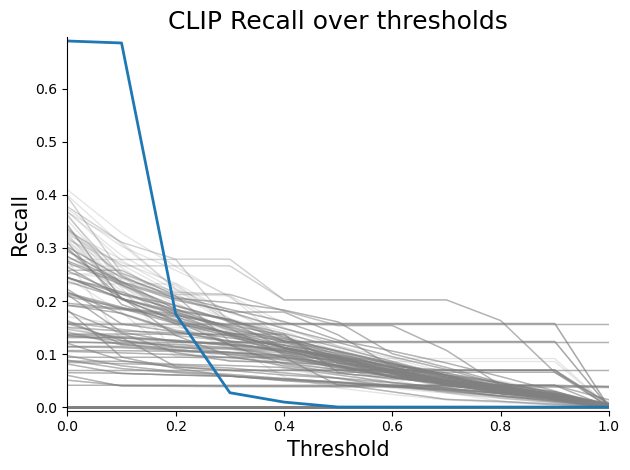

TOP CONFIG: K10-r0-DEtok-a10000000000.0-t0

MULTI-THREHOLDING:
plip = 0.43076426503829357 (k2)
plip = 0.690371956276758 (pcm)

k2 min delta: 0.0
k2 mean delta: 0.1615025376815308
k2 median delta: 0.1991486113911549
k2 max delta: 0.43076426503829357

pcm delta: 0.690371956276758
sam delta: None

ADAPTIVE THRESHOLDING
plip = 0.0 (pcm-thresh forward)
plip = 1.0 (pcm-thresh backward)


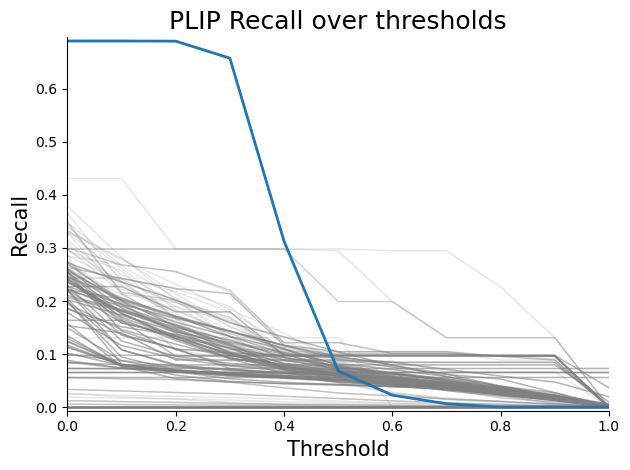

In [18]:
bars, tcs = get_max_performances(results_list, elastic_list, encoder_list, other_results=other_results, stat="recall", type="thresh_max")
top_configs.append(tcs)

In [19]:
# bars = get_max_performances(results_list, elastic_list, encoder_list, other_results=other_results, stat="prevalence", type="thresh_max")

In [20]:
top_configs

[['K10-r8-DEtok-a0.01-t1',
  'K10-r8-elastic',
  'K30-r4-DEtok-a0.01-t2',
  'K30-r1-DEtok-a0.01-t2'],
 ['K10-r4-elastic',
  'K10-r4-elastic',
  'K15-r1-DEtok-a0.01-t1',
  'K30-r1-DEtok-a0.01-t2'],
 ['K10-r4-elastic',
  'K10-r4-elastic',
  'K15-r1-DEtok-a0.01-t0',
  'K15-r2-DEtok-a0.01-t1'],
 ['K25-r1-elastic',
  'K10-r4-DEtok-a0.01-t0',
  'K10-r1-DEtok-a0.01-t0',
  'K30-r1-DEtok-a0.01-t2'],
 ['K20-r0-DEtok-a0.05-t0',
  'K25-r1-elastic',
  'K30-r2-DEtok-a0.01-t1',
  'K30-r2-DEtok-a0.01-t1'],
 ['K30-r2-elastic',
  'K10-r2-elastic',
  'K10-r1-elastic',
  'K10-r0-DEtok-a10000000000.0-t0']]

In [21]:
from utils import serialize
utils.serialize(top_configs, "/home/lofi/lofi/src/outputs/top_configs.obj")

performing analyses on stat: 0
performing analyses on model: tile2vec-K10-r8-DEtok-a0.01-t1


/home/envs/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator KMeans from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


performing analyses on model: vit_iid-K10-r8-elastic
performing analyses on model: clip-K30-r4-DEtok-a0.01-t2
performing analyses on model: plip-K30-r1-DEtok-a0.01-t2
performing analyses on stat: 1
performing analyses on model: tile2vec-K10-r4-elastic


/home/envs/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator KMeans from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


performing analyses on model: vit_iid-K10-r4-elastic
performing analyses on model: clip-K15-r1-DEtok-a0.01-t1
performing analyses on model: plip-K30-r1-DEtok-a0.01-t2
performing analyses on stat: 2
performing analyses on model: tile2vec-K10-r4-elastic


/home/envs/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator KMeans from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


performing analyses on model: vit_iid-K10-r4-elastic
performing analyses on model: clip-K15-r1-DEtok-a0.01-t0
performing analyses on model: plip-K15-r2-DEtok-a0.01-t1
performing analyses on stat: 3
performing analyses on model: tile2vec-K25-r1-elastic


/home/envs/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator KMeans from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


performing analyses on model: vit_iid-K10-r4-DEtok-a0.01-t0
performing analyses on model: clip-K10-r1-DEtok-a0.01-t0
performing analyses on model: plip-K30-r1-DEtok-a0.01-t2
performing analyses on stat: 4
performing analyses on model: tile2vec-K20-r0-DEtok-a0.05-t0


/home/envs/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator KMeans from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


performing analyses on model: vit_iid-K25-r1-elastic
performing analyses on model: clip-K30-r2-DEtok-a0.01-t1
performing analyses on model: plip-K30-r2-DEtok-a0.01-t1
performing analyses on stat: 5
performing analyses on model: tile2vec-K30-r2-elastic


/home/envs/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator KMeans from version 1.1.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/lofi/lofi/src/embed_patches.py:1483: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(16, 8))


performing analyses on model: vit_iid-K10-r2-elastic
performing analyses on model: clip-K10-r1-elastic
performing analyses on model: plip-K10-r0-DEtok-a10000000000.0-t0


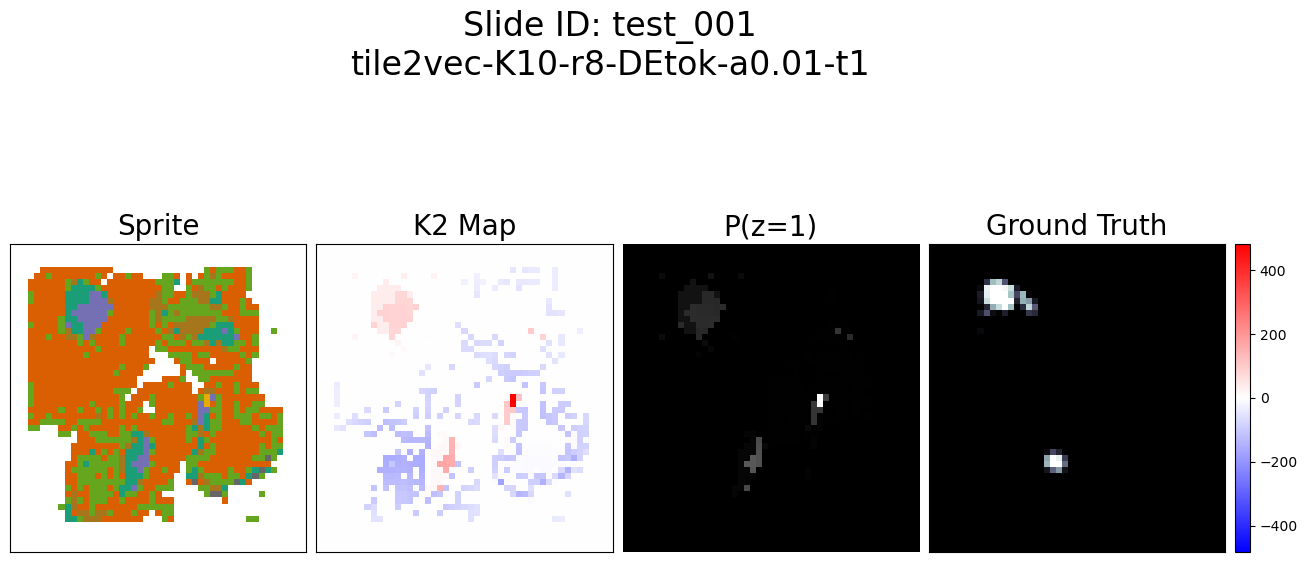

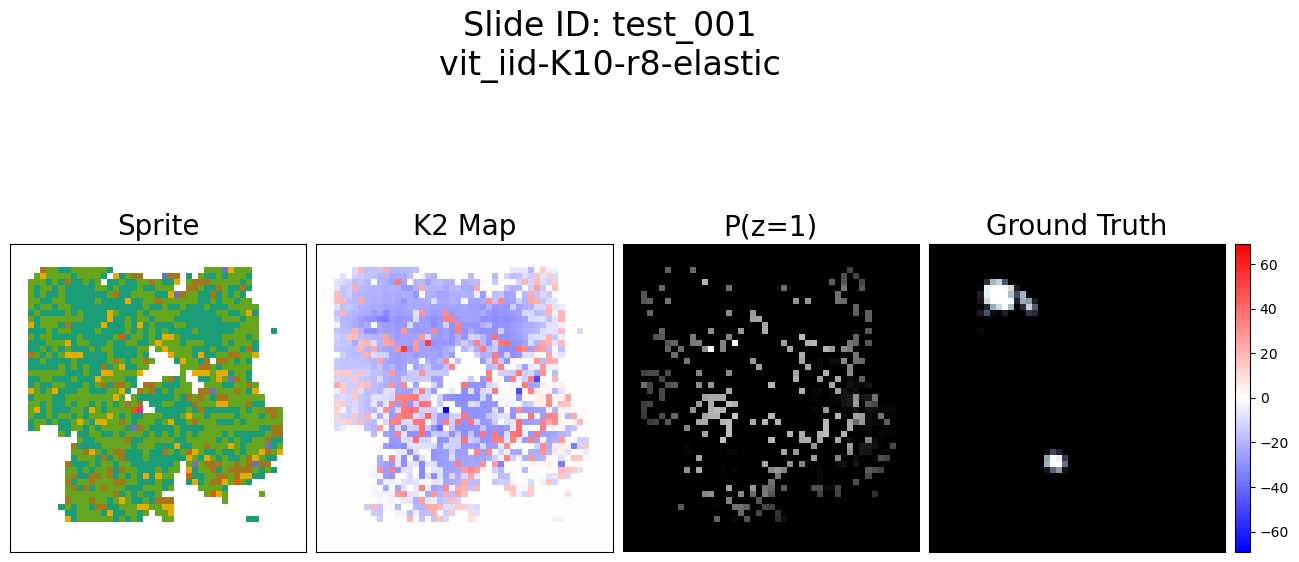

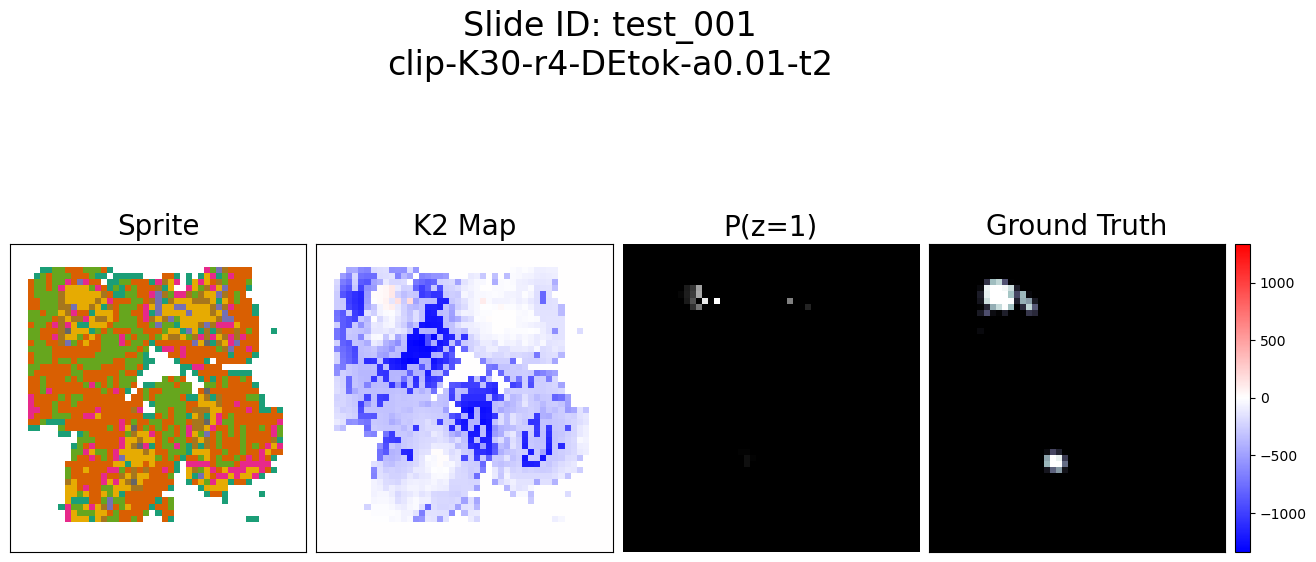

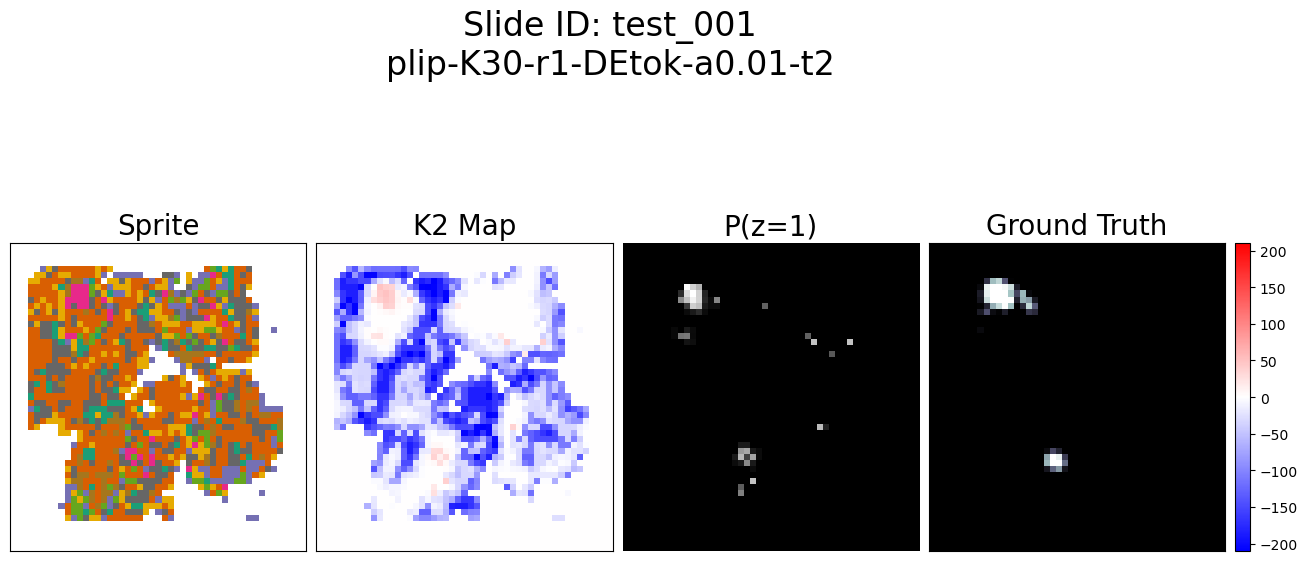

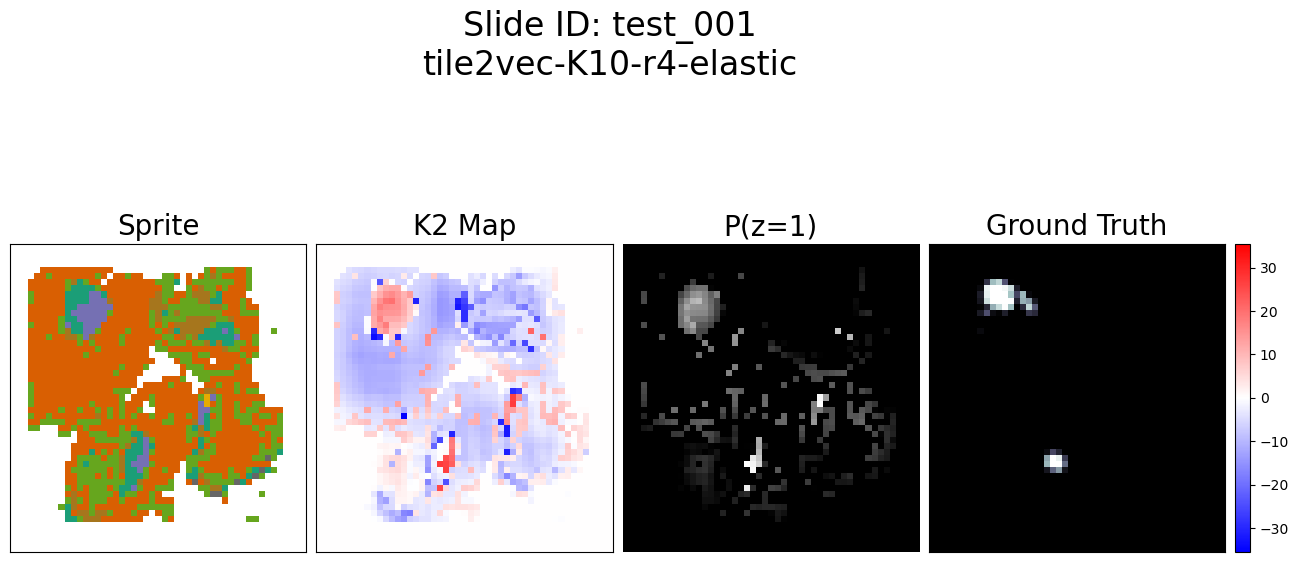

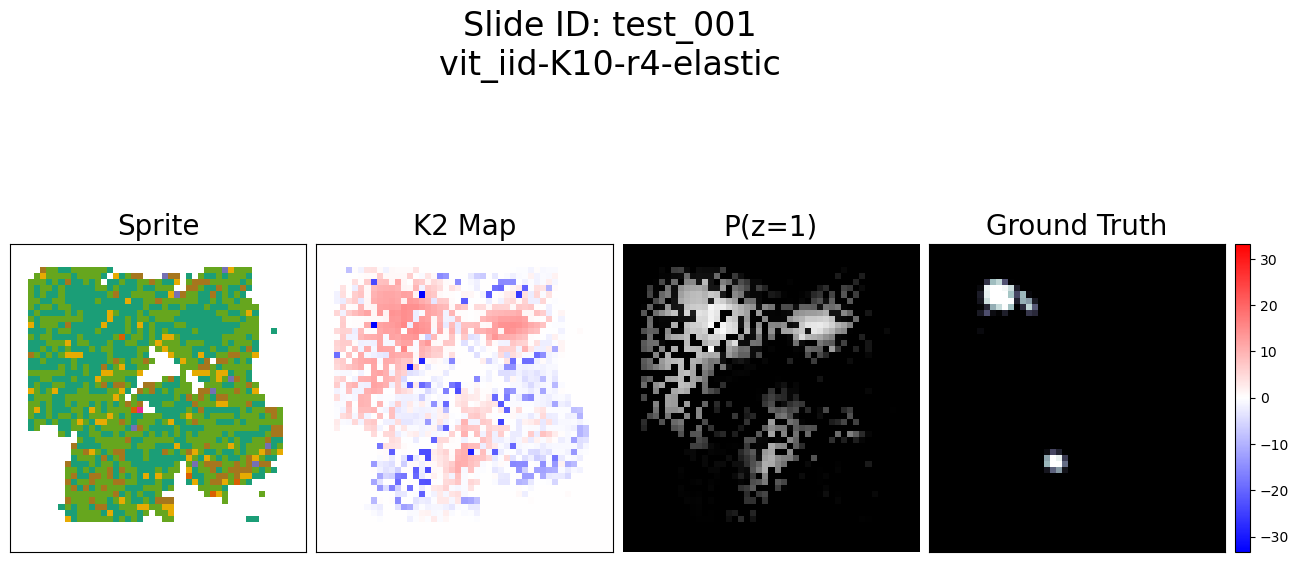

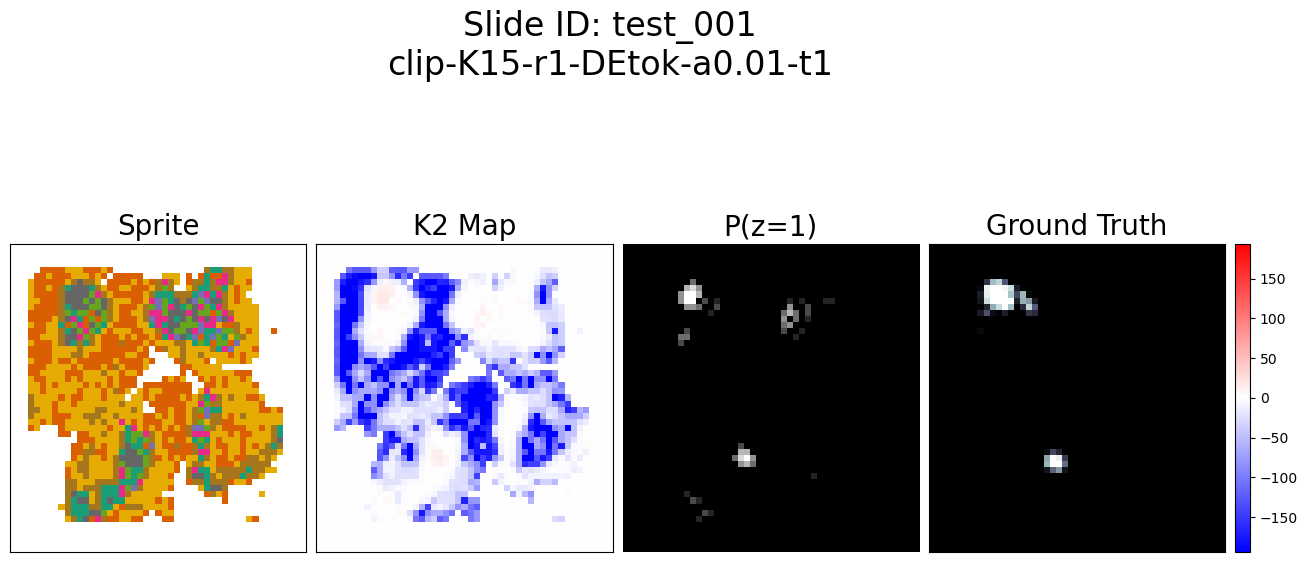

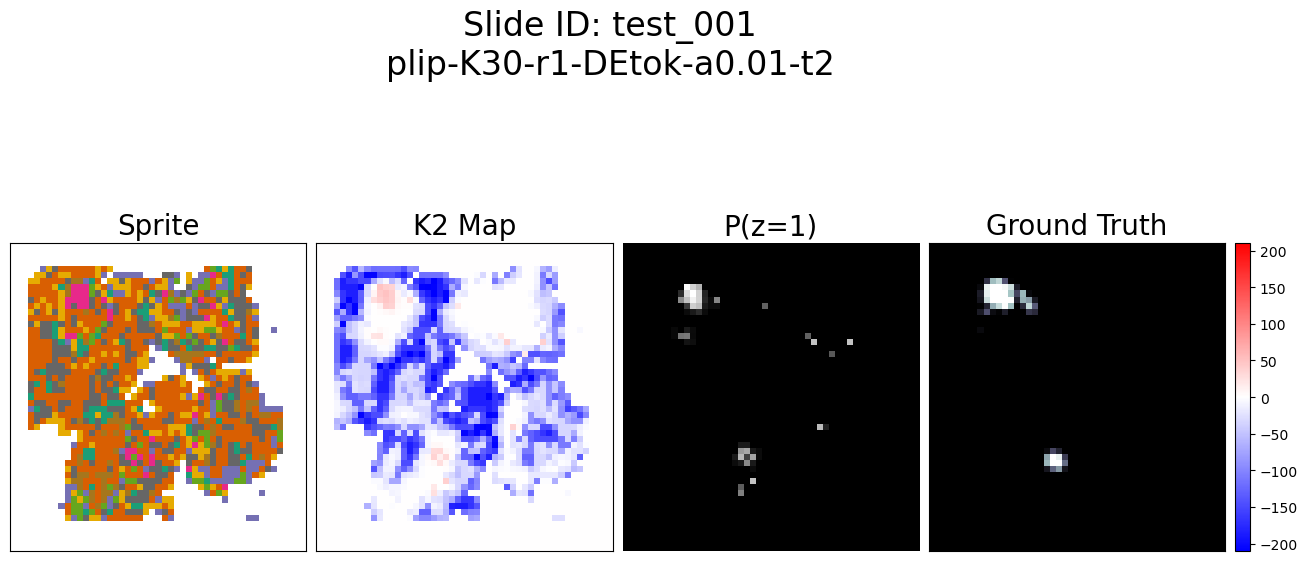

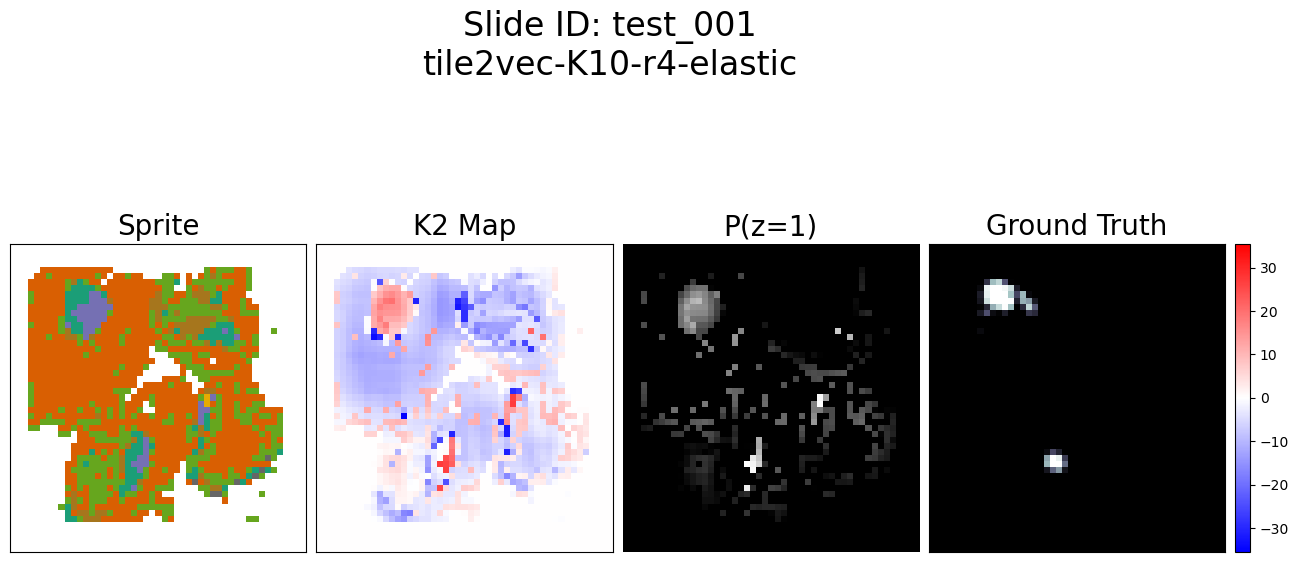

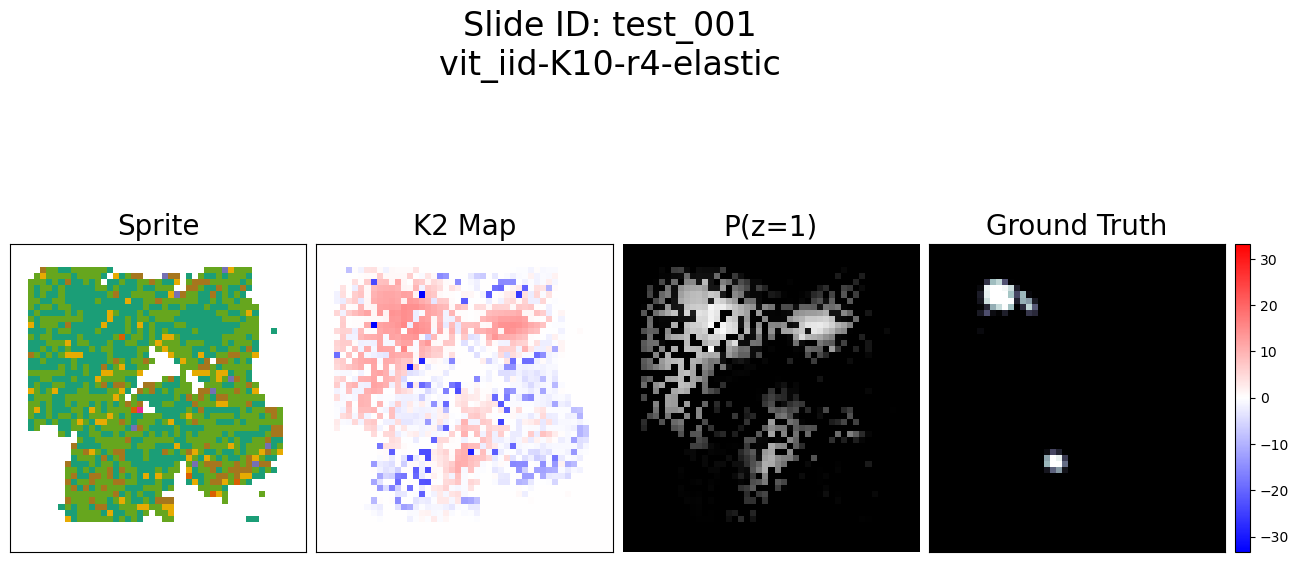

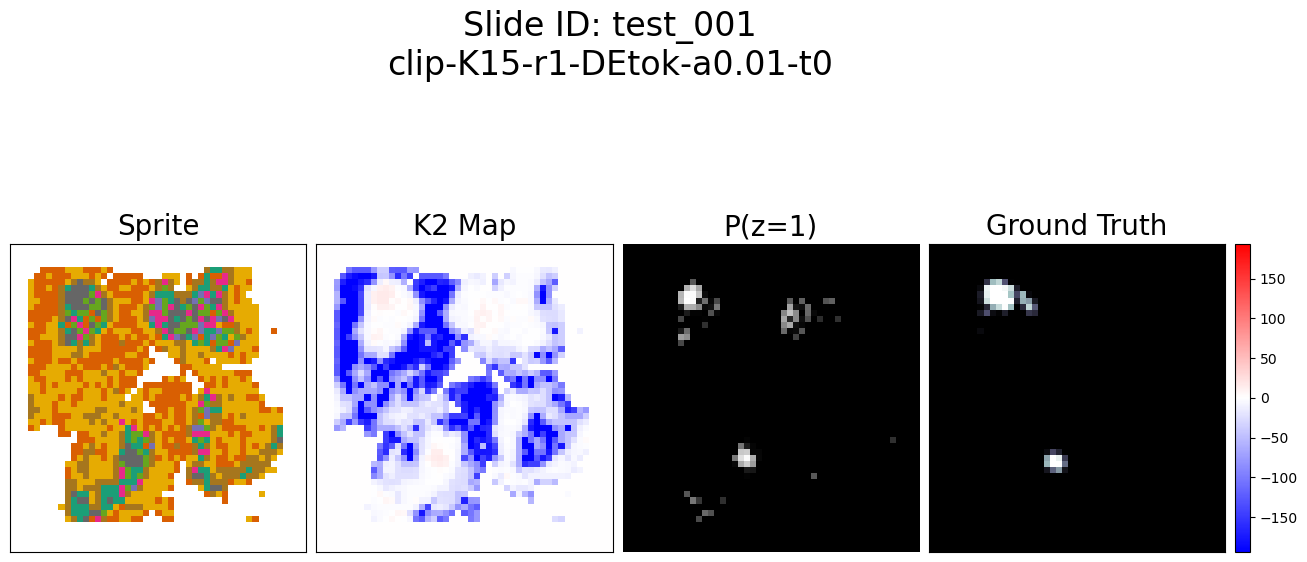

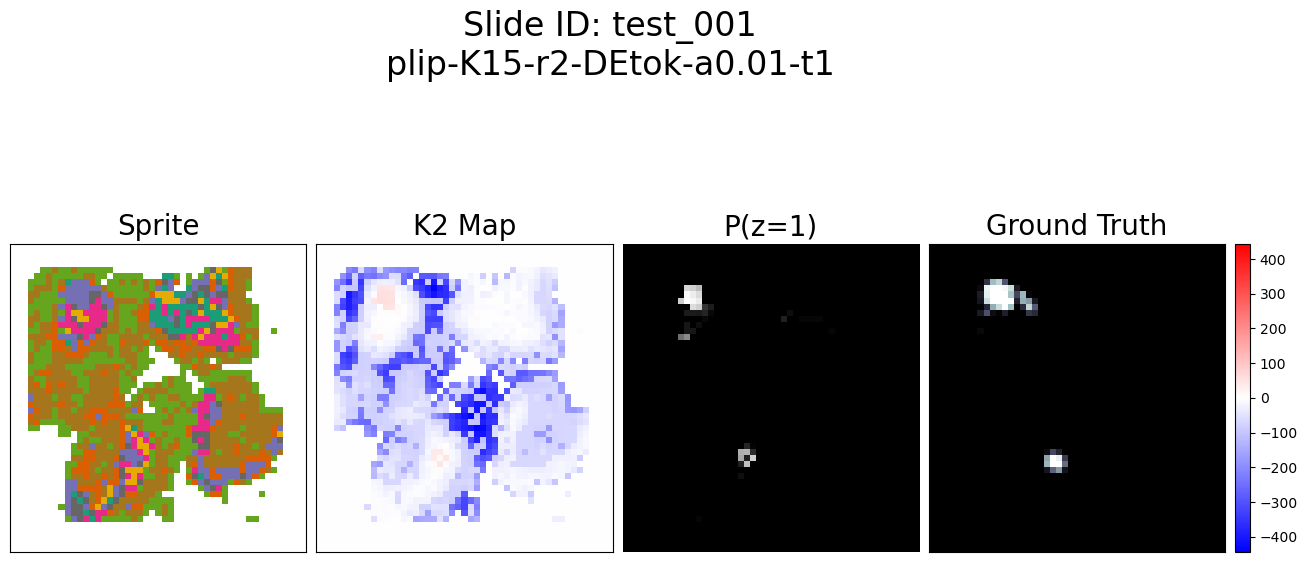

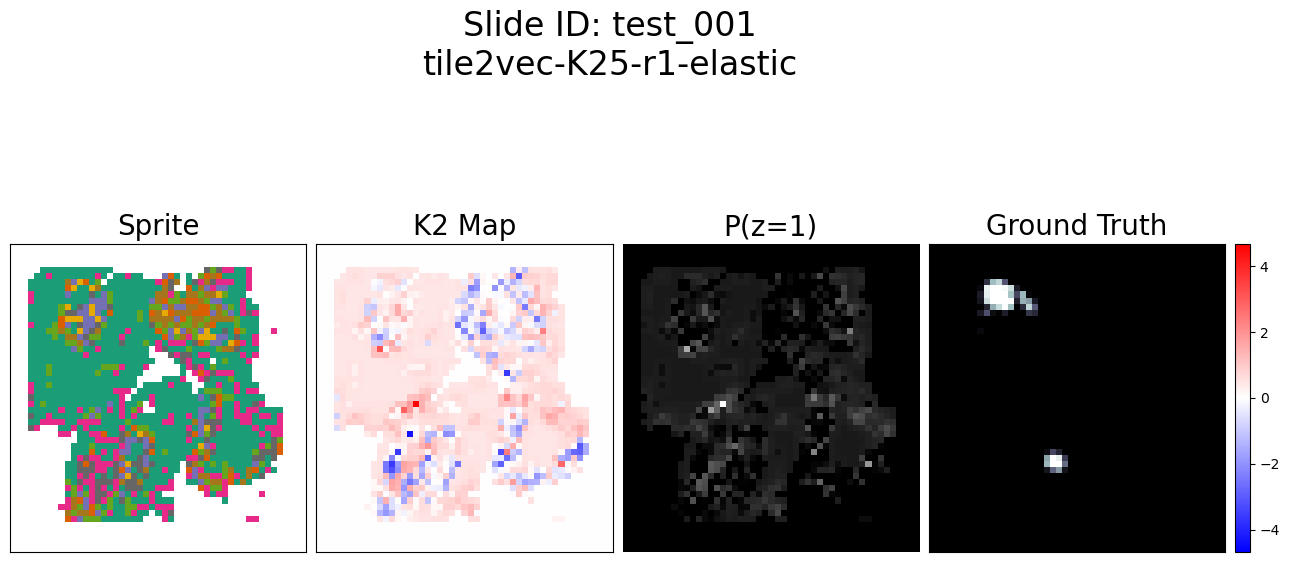

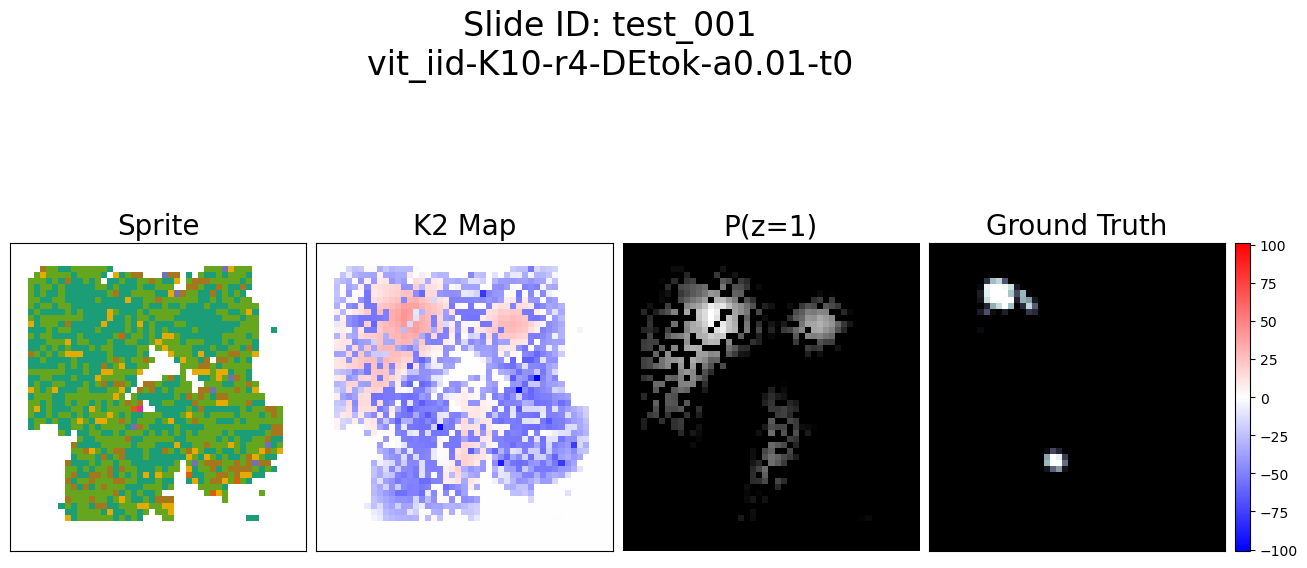

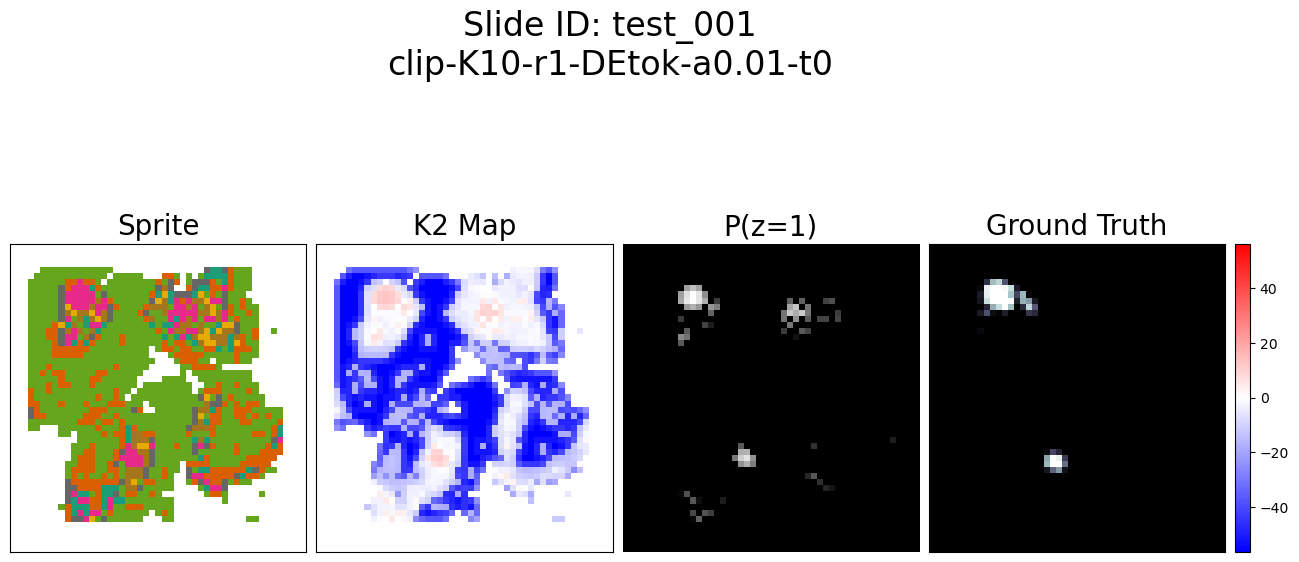

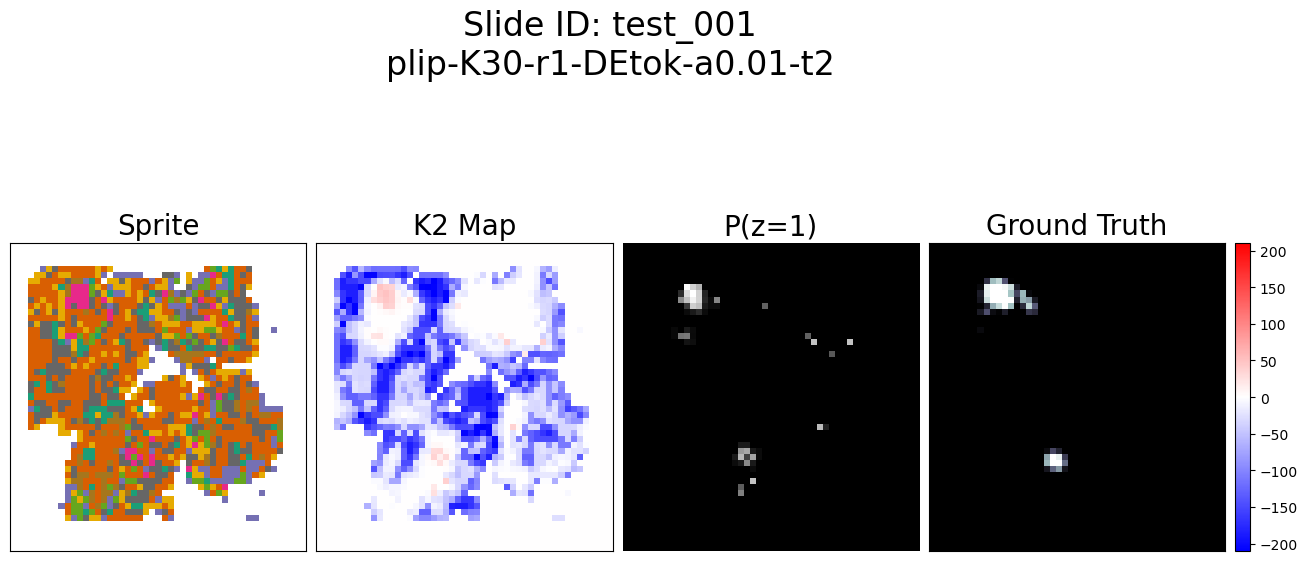

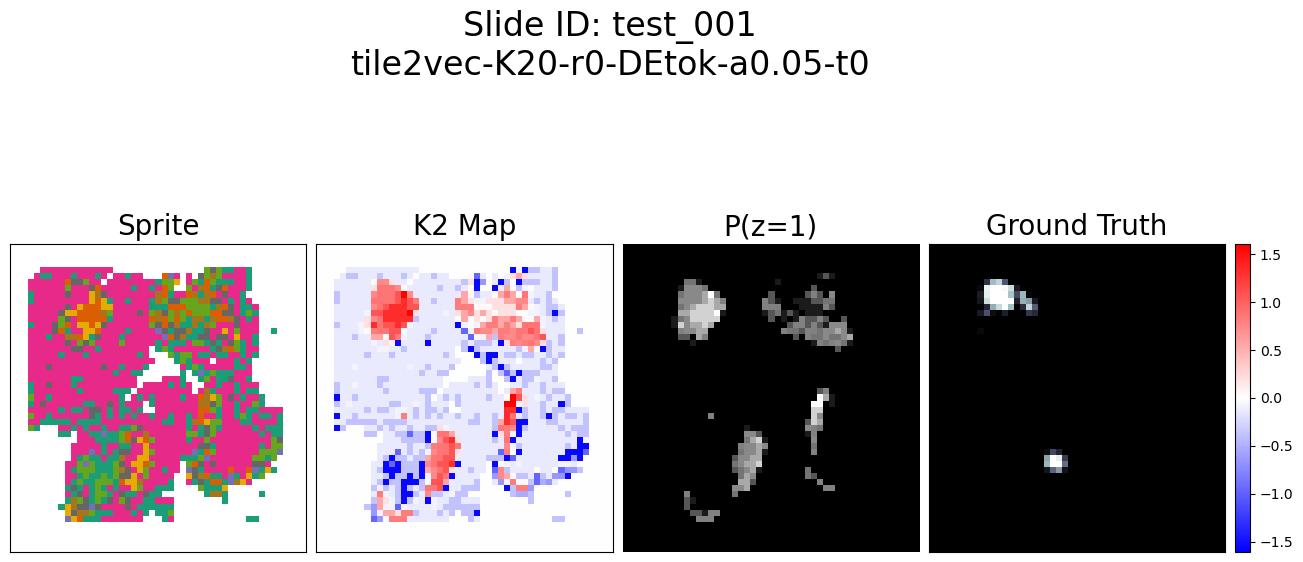

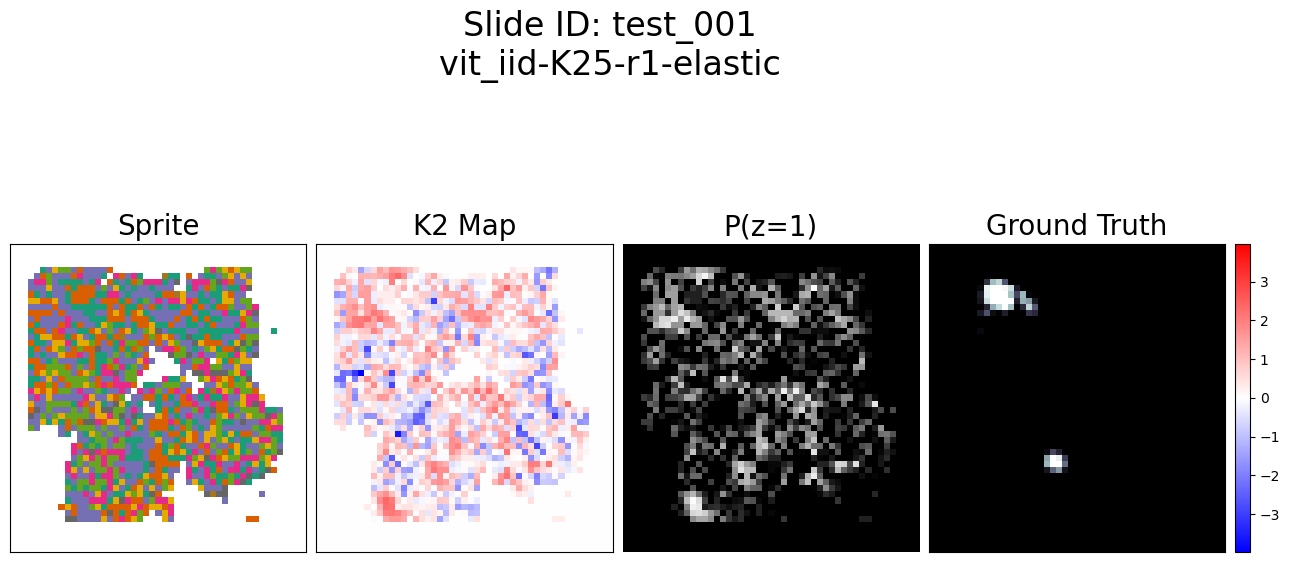

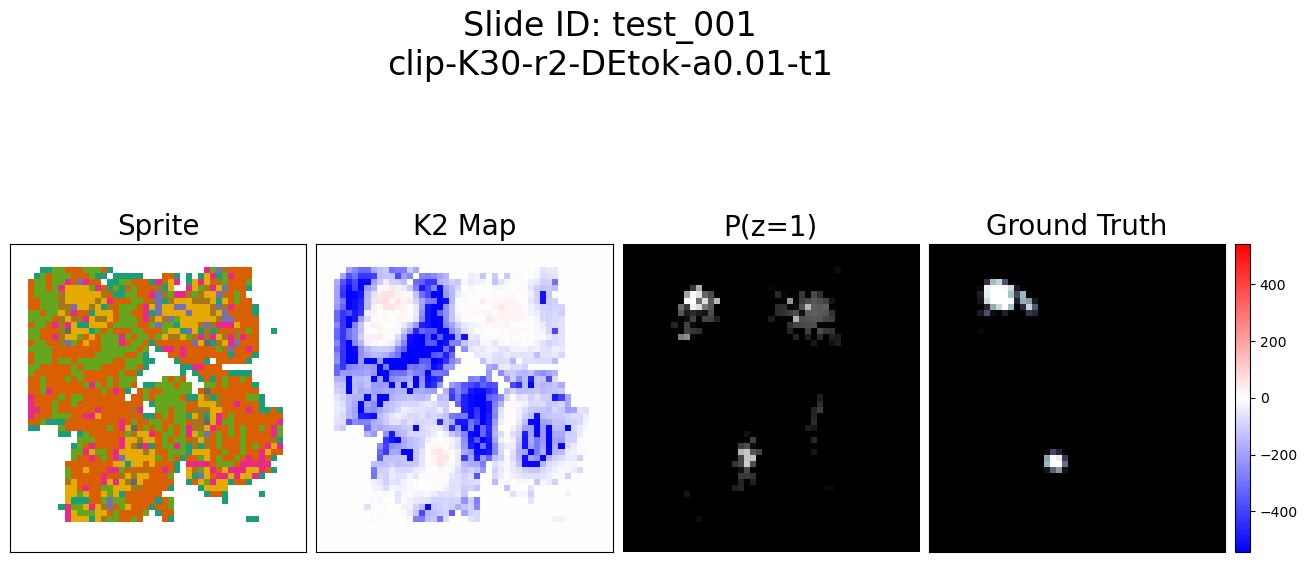

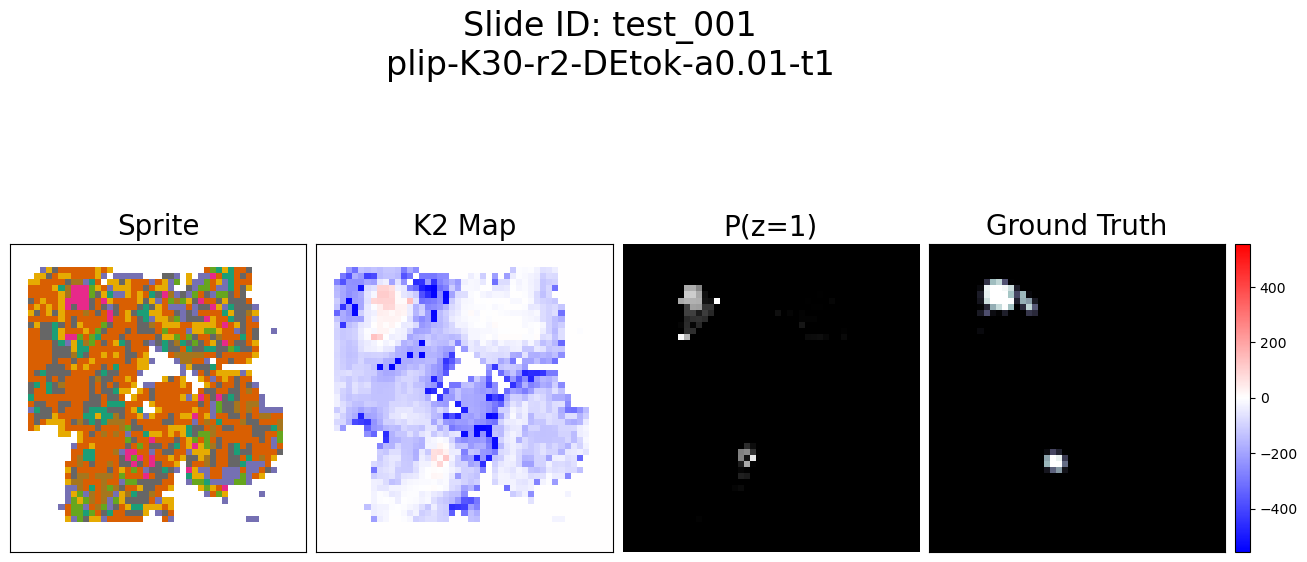

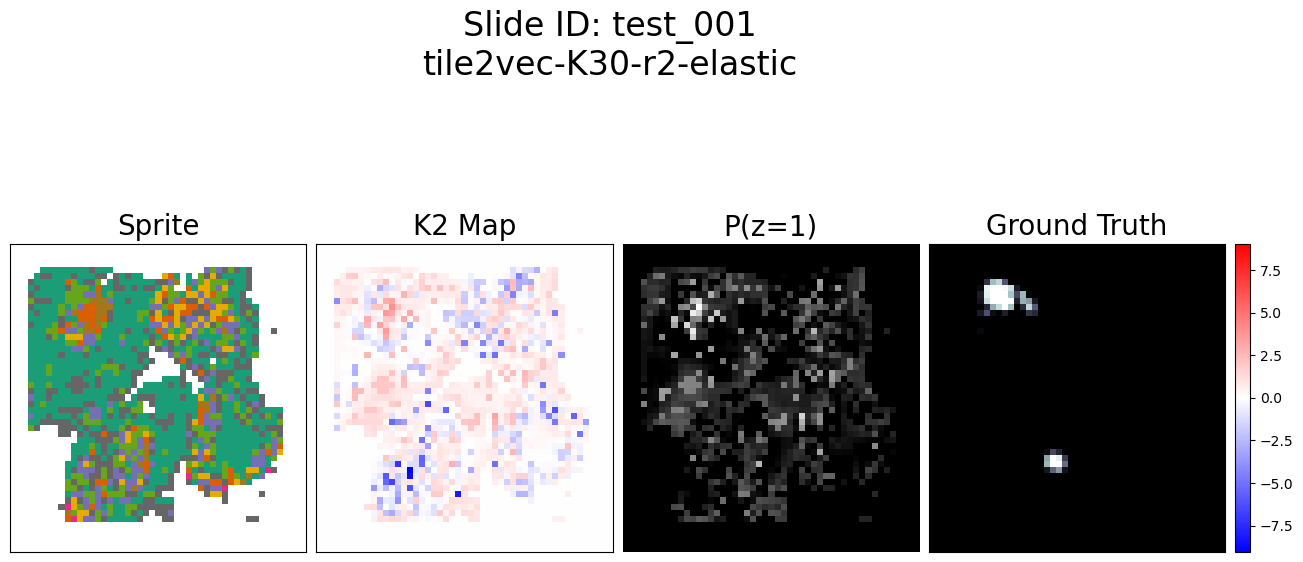

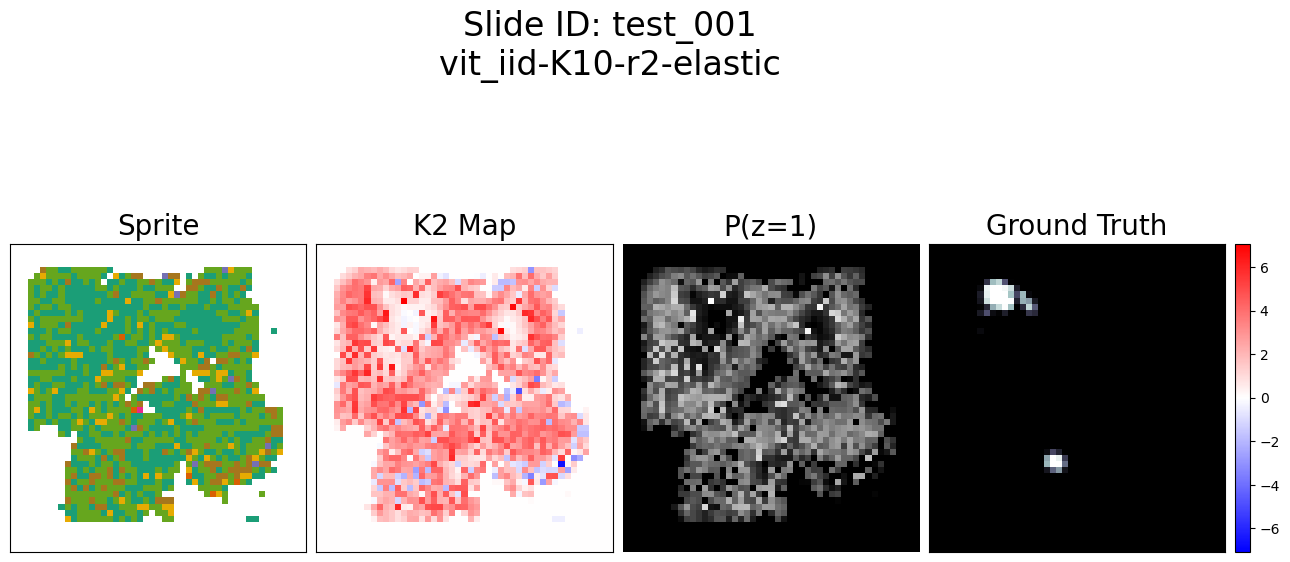

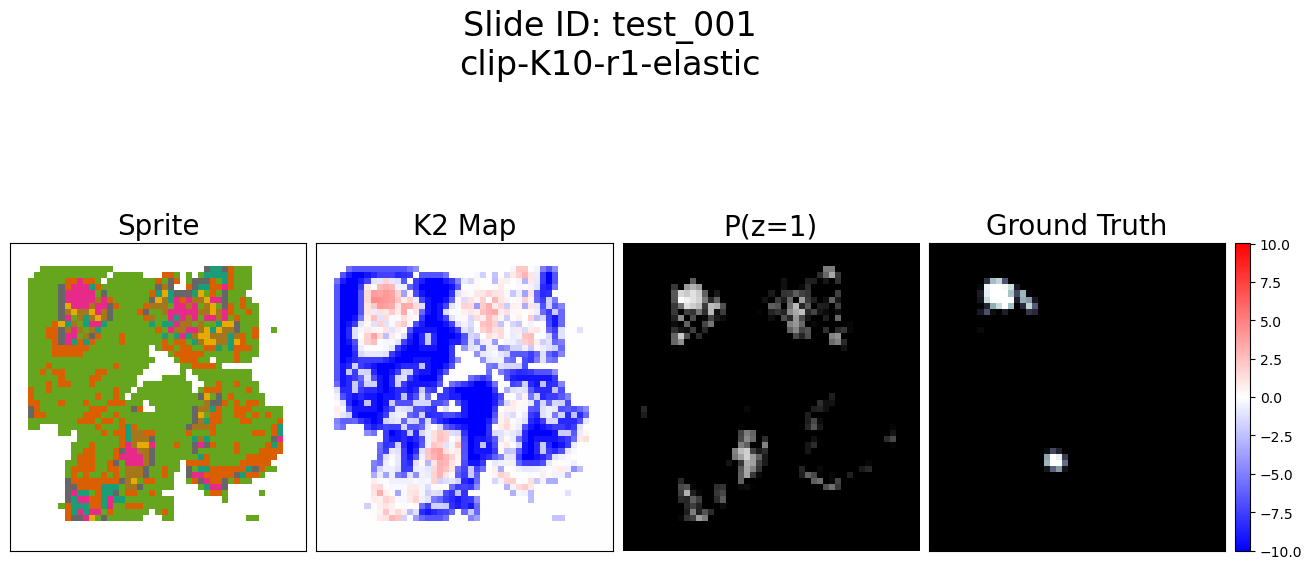

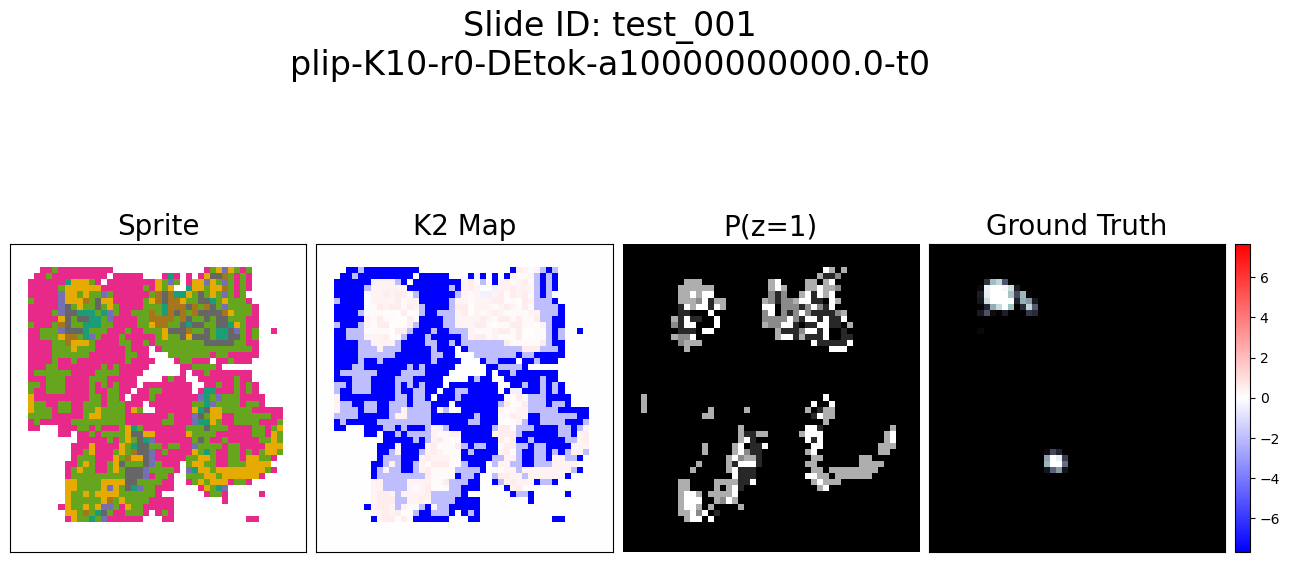

In [27]:
from embed_patches import eval_lofi_top_models
lofi_results_adaptive = eval_lofi_top_models(top_configs, Zs_list, kmeans_list, elastic_list, tfidfs_list, crops_list, gts_path, label_dict, encoder_list)

# visualize test SPM and SAM

45 4 44 3


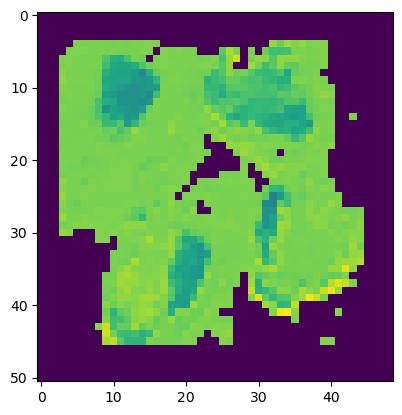

In [42]:
import matplotlib.pyplot as plt
import os
import numpy as np
from embed_patches import clean_pcm
from utils import deserialize

output_path = "/home/data/tinycam/test/clean_Zs/Z-test_001.npy"
im = np.load(output_path)
im = np.sum(im, axis=2)

crop_dict = deserialize("/home/lofi/lofi/src/outputs_tile2vec/test_crop_coords.obj")
i0, i1 = crop_dict["test_001"][0]
j0, j1 = crop_dict["test_001"][1]
im = im[i0:i1, j0:j1]
plt.imshow(im)

y,x = (im > 0.0).nonzero()
xy = list(zip(list(y), list(x)))


y_max = max(xy, key=lambda item: item[0])[0]
y_min = min(xy, key=lambda item: item[0])[0]
x_max = max(xy, key=lambda item: item[1])[1]
x_min = min(xy, key=lambda item: item[1])[1]
print(y_max, y_min, x_max, x_min)

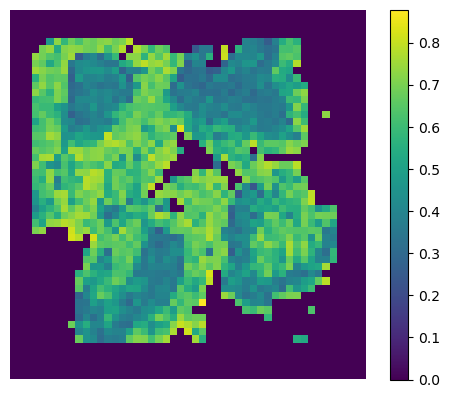

In [49]:
output_path = "/home/data/tinycam/test/probs_plip/P-test_001.npy"
im = np.load(output_path)
im[:y_min, :, :] = 0
im[y_max+1:, :, :] = 0
im[:, :x_min, :] = 0
im[:, x_max+1:, :] = 0

plt.imshow(im)
plt.axis("off")
plt.colorbar()
plt.show()

In [28]:
# utils.serialize(lofi_results_adaptive, "/home/lofi/lofi/src/outputs/lofi_results_adaptive.obj")

In [29]:
# summaries_adaptive = {}
# for encoder_k2 in lofi_results_adaptive.keys():
#     result_arr = lofi_results_adaptive[encoder_k2]
#     temp_results = []
#     for Z_id in result_arr.keys():
#         temp_results.append(result_arr[Z_id])
#     temp_results = np.array(temp_results) # get test results
#     summaries_adaptive[encoder_k2] = np.mean(temp_results, axis=0)

In [1]:
# summaries_adaptive

In [32]:
# temp_results_0 = []
# temp_results_1 = []
# temp_results_2 = []
# temp_results_3 = []
# for encoder_k2 in summaries_adaptive.keys():
#     num_id = encoder_k2.split("_")[1]
#     if num_id == "0":
#         temp_results_0.append(summaries_adaptive[encoder_k2])
#     elif num_id == "1":
#         temp_results_1.append(summaries_adaptive[encoder_k2])
#     elif num_id == "2":
#         temp_results_2.append(summaries_adaptive[encoder_k2])
#     elif num_id == "3":
#         temp_results_3.append(summaries_adaptive[encoder_k2])

# temp_results_0 = np.array(temp_results_0)
# temp_results_1 = np.array(temp_results_1)
# temp_results_2 = np.array(temp_results_2)
# temp_results_3 = np.array(temp_results_3)

# max_results_0 = np.max(temp_results_0, axis=0)
# max_results_1 = np.max(temp_results_1, axis=0)
# max_results_2 = np.max(temp_results_2, axis=0)
# max_results_3 = np.max(temp_results_3, axis=0)


In [2]:
# max_results_0
# [prec_f, prec_b, bacc_f, bacc_b, mcc_f, mcc_b, auroc, auprc, ap, mod_f, mod_b]

In [3]:
# max_results_1
# [prec_f, prec_b, bacc_f, bacc_b, mcc_f, mcc_b, auroc, auprc, ap, mod_f, mod_b]

In [4]:
# max_results_2
# [prec_f, prec_b, bacc_f, bacc_b, mcc_f, mcc_b, auroc, auprc, ap, mod_f, mod_b]

In [5]:
# max_results_3
# [prec_f, prec_b, bacc_f, bacc_b, mcc_f, mcc_b, auroc, auprc, ap, mod_f, mod_b]

In [32]:
for t in ["auc", "mean"]: # "max", "median"]:
    print(t)
    bars = get_max_performances(results_list, elastic_list, encoder_list, other_results=[], stat="precision", type=t)

auc
tile2vec = 0.8361872716657066
vit_iid = 0.8369667463495771
mean
tile2vec = 0.8356777813467885
vit_iid = 0.8352856825022382
max
tile2vec = 0.8408484377941331
vit_iid = 0.8433471036513126
median
tile2vec = 0.8379520696137965
vit_iid = 0.8397877281578306


In [31]:
for t in ["auc", "mean"]: # "max", "median"]:
    print(t)
    bars = get_max_performances(results_list, elastic_list, encoder_list, other_results=[], stat="accuracy", type=t)

auc
tile2vec = 0.8149812518985659
vit_iid = 0.789976093087964
mean
tile2vec = 0.8104488497521561
vit_iid = 0.7800802140080322
max
tile2vec = 0.8432068025398665
vit_iid = 0.8602579909390586
median
tile2vec = 0.8271772524965775
vit_iid = 0.8267074585874952


In [33]:
for t in ["auc", "mean"]: # "max", "median"]:
    print(t)
    bars = get_max_performances(results_list, elastic_list, encoder_list, other_results=[], stat="sensitivity", type=t)

auc
tile2vec = 0.9658434304227707
vit_iid = 0.9350979824004151
mean
tile2vec = 0.9597297701463986
vit_iid = 0.9203161381323095
max
tile2vec = 1.0
vit_iid = 1.0
median
tile2vec = 0.9835548590612305
vit_iid = 0.9822775394160993


In [34]:
for t in ["auc", "mean"]: # "max", "median"]:
    print(t)
    bars = get_max_performances(results_list, elastic_list, encoder_list, other_results=[], stat="dice", type=t)

auc
tile2vec = 0.8683163538424852
vit_iid = 0.8461805764345887
mean
tile2vec = 0.8642954805605206
vit_iid = 0.8345269131254333
max
tile2vec = 0.8869555841455405
vit_iid = 0.8870131327425474
median
tile2vec = 0.8787395660113266
vit_iid = 0.8789144977381882


In [40]:
for t in ["auc", "mean"]: # "max", "median"]:
    print(t)
    bars = get_max_performances(results_list, elastic_list, encoder_list, other_results=[], stat="phi", type=t)

auc
tile2vec = -0.020534219249097874
vit_iid = -0.009961718811175586
mean
tile2vec = -0.020998387089022363
vit_iid = -0.01276736009453551


In [ ]:
from embed_patches import plot_top_performances
plot_top_performances(bars)